# Continuous Control

---

You are welcome to use this coding environment to train your agent for the project.  Follow the instructions below to get started!

### 1. Start the Environment

In [1]:
import gym
import random
import torch
import numpy as np
from collections import deque
import matplotlib.pyplot as plt
%matplotlib inline

Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [2]:
env = gym.make('Pendulum-v0')

/home/arasdar/anaconda3/lib/python3.6/site-packages/gym/envs/registration.py:14: PkgResourcesDeprecationWarning: Parameters to load are deprecated.  Call .resolve and .require separately.
  result = entry_point.load(False)


### 2. Examine the State and Action Spaces

Run the code cell below to print some information about the environment.

In [3]:
env.action_space, env.observation_space

(Box(1,), Box(3,))

In [4]:
action_size = env.action_space.shape[0]
state_size = env.observation_space.shape[0]

In [5]:
action_size, state_size

(1, 3)

In [6]:
env.observation_space.low, env.observation_space.high

(array([-1., -1., -8.], dtype=float32), array([1., 1., 8.], dtype=float32))

In [7]:
env.action_space.low, env.action_space.high

(array([-2.], dtype=float32), array([2.], dtype=float32))

In [8]:
env.reward_range

(-inf, inf)

### 3. Instantiate DDPG Agent

In [9]:
RANDOM_SEED = 10        # random seed for reproducibility of results
BUFFER_SIZE = int(1e5)  # replay buffer size
BATCH_SIZE = 128        # minibatch size
GAMMA = 0.999            # discount factor
LR_D = 1e-4         # learning rate of the actor/discriminator 
LR_G = 1e-3        # learning rate of the generator
H_SIZE = 400

In [10]:
env.seed(RANDOM_SEED)

[10]

In [11]:
from agent import Agent

agent = Agent(s_size=state_size, a_size=action_size, h_size=H_SIZE,
              random_seed=RANDOM_SEED, buffer_size=BUFFER_SIZE, 
              batch_size=BATCH_SIZE, gamma=GAMMA, lr_d=LR_D, lr_g=LR_G)

### 4. Train the Agent with DDPG

In [13]:
n_episodes=10000
# n_steps=1000
# n_learn=10
# learn_every=20
R_goal=0 # TOCHECK
Rs_deque = deque(maxlen=100)
list_episodes = []

In [14]:
for i_episode in range(n_episodes):
    
    s = env.reset() # s: state
    #print(s.shape)

    # initialize the score (for each agent)
    R = 0 # R: total reward
    list_steps = []
    
    #for i_step in range(n_steps):
    while True:
        
        s = np.reshape(s, [1, -1])
        a = agent.act(s) # a=[-2, 2]
        a *= 2
        #print(a.shape)
        
        a = np.reshape(a, [-1])
        s2, r, done, _ = env.step(a)
        #print(s2.shape, r, done)

        s = np.reshape(s, [-1])
        agent.memory.add(s, a, r, s2, done)

        R += r                           # update the score (for each agent)
        s = s2                                # roll over states to next time step

        gloss, dloss, reward, reward_in = agent.start_learn()
        list_steps.append([gloss, dloss, reward, reward_in])

        # exit loop if episode finished
        if done:
            break

    Rs_deque.append(R) # not a list but deque
    
    print('\rEpisode {}\tTotal Average Score: {:.2f}'.format(i_episode+1, np.mean(Rs_deque)), 
          'Gloss:{:.4f}'.format(np.mean(list_steps, axis=0)[0]), 
          'Dloss:{:.4f}'.format(np.mean(list_steps, axis=0)[1]),
          'reward:{:.4f}'.format(np.mean(list_steps, axis=0)[2]), 
          'reward_in:{:.4f}'.format(np.mean(list_steps, axis=0)[3]))

    # Plotting
    list_episodes.append([np.mean(Rs_deque), 
                          np.mean(list_steps, axis=0)[0], # gloss
                          np.mean(list_steps, axis=0)[1], # dloss
                          np.mean(list_steps, axis=0)[2], # rewards mean
                          np.mean(list_steps, axis=0)[3]]) # reward_in mean

    
    if np.mean(Rs_deque) >= R_goal:
        torch.save(agent.g.state_dict(), 'g-pendulum.pth')
        torch.save(agent.d.state_dict(), 'd-pendulum.pth')
        break

Episode 1	Total Average Score: -1215.13 Gloss:287.6008 Dloss:-0.0483 reward:-2.2470 reward_in:0.0000
Episode 2	Total Average Score: -1520.60 Gloss:894.4889 Dloss:-0.1282 reward:-6.9919 reward_in:0.0001
Episode 3	Total Average Score: -1341.53 Gloss:898.5991 Dloss:-0.1159 reward:-7.0353 reward_in:0.0001
Episode 4	Total Average Score: -1233.84 Gloss:813.7974 Dloss:-0.0955 reward:-6.3909 reward_in:0.0001
Episode 5	Total Average Score: -1314.84 Gloss:806.3221 Dloss:-0.0675 reward:-6.3560 reward_in:0.0001
Episode 6	Total Average Score: -1376.69 Gloss:855.5703 Dloss:-0.0331 reward:-6.7675 reward_in:0.0001
Episode 7	Total Average Score: -1409.95 Gloss:879.5942 Dloss:0.0098 reward:-6.9868 reward_in:0.0001
Episode 8	Total Average Score: -1367.72 Gloss:865.9841 Dloss:0.0590 reward:-6.9137 reward_in:0.0001
Episode 9	Total Average Score: -1366.42 Gloss:850.7734 Dloss:0.1132 reward:-6.8280 reward_in:0.0001
Episode 10	Total Average Score: -1378.46 Gloss:852.1335 Dloss:0.1744 reward:-6.8728 reward_in:

Episode 82	Total Average Score: -1589.77 Gloss:812.3903 Dloss:14.7585 reward:-7.9358 reward_in:0.0001
Episode 83	Total Average Score: -1591.44 Gloss:813.4919 Dloss:15.0950 reward:-7.9590 reward_in:0.0001
Episode 84	Total Average Score: -1591.47 Gloss:808.1412 Dloss:15.4197 reward:-7.9314 reward_in:0.0001
Episode 85	Total Average Score: -1591.44 Gloss:814.5677 Dloss:15.7611 reward:-7.9922 reward_in:0.0001
Episode 86	Total Average Score: -1592.01 Gloss:809.1609 Dloss:16.0981 reward:-7.9640 reward_in:0.0001
Episode 87	Total Average Score: -1591.79 Gloss:807.9730 Dloss:16.4486 reward:-7.9647 reward_in:0.0001
Episode 88	Total Average Score: -1590.45 Gloss:805.5869 Dloss:16.7908 reward:-7.9619 reward_in:0.0001
Episode 89	Total Average Score: -1590.79 Gloss:804.7537 Dloss:17.1380 reward:-7.9684 reward_in:0.0001
Episode 90	Total Average Score: -1592.29 Gloss:800.8778 Dloss:17.4932 reward:-7.9582 reward_in:0.0001
Episode 91	Total Average Score: -1594.87 Gloss:800.4913 Dloss:17.8507 reward:-7.95

Episode 162	Total Average Score: -1661.89 Gloss:705.8719 Dloss:51.5956 reward:-8.1264 reward_in:0.0001
Episode 163	Total Average Score: -1664.63 Gloss:702.3193 Dloss:52.1759 reward:-8.1396 reward_in:0.0001
Episode 164	Total Average Score: -1667.35 Gloss:708.4475 Dloss:52.7740 reward:-8.1296 reward_in:0.0001
Episode 165	Total Average Score: -1671.71 Gloss:701.3638 Dloss:53.4368 reward:-8.1435 reward_in:0.0001
Episode 166	Total Average Score: -1675.16 Gloss:704.3873 Dloss:53.9866 reward:-8.1643 reward_in:0.0001
Episode 167	Total Average Score: -1675.97 Gloss:702.7403 Dloss:54.5719 reward:-8.1400 reward_in:0.0001
Episode 168	Total Average Score: -1674.87 Gloss:701.8921 Dloss:55.1607 reward:-8.1390 reward_in:0.0001
Episode 169	Total Average Score: -1673.60 Gloss:699.4431 Dloss:55.8046 reward:-8.1506 reward_in:0.0001
Episode 170	Total Average Score: -1672.38 Gloss:692.5081 Dloss:56.3912 reward:-8.1180 reward_in:0.0001
Episode 171	Total Average Score: -1672.73 Gloss:697.3062 Dloss:57.0406 re

Episode 242	Total Average Score: -1584.69 Gloss:636.0274 Dloss:106.1579 reward:-8.0590 reward_in:0.0001
Episode 243	Total Average Score: -1584.46 Gloss:638.2405 Dloss:106.8992 reward:-8.0490 reward_in:0.0001
Episode 244	Total Average Score: -1582.02 Gloss:632.8982 Dloss:107.7226 reward:-8.0292 reward_in:0.0001
Episode 245	Total Average Score: -1583.41 Gloss:637.5631 Dloss:108.4429 reward:-8.0722 reward_in:0.0001
Episode 246	Total Average Score: -1579.82 Gloss:630.7523 Dloss:109.3217 reward:-8.0712 reward_in:0.0001
Episode 247	Total Average Score: -1578.61 Gloss:633.6213 Dloss:110.0417 reward:-8.0183 reward_in:0.0001
Episode 248	Total Average Score: -1577.66 Gloss:631.3959 Dloss:110.8344 reward:-8.0251 reward_in:0.0001
Episode 249	Total Average Score: -1577.89 Gloss:624.9213 Dloss:111.6974 reward:-8.0414 reward_in:0.0001
Episode 250	Total Average Score: -1578.52 Gloss:628.9139 Dloss:112.4420 reward:-8.0332 reward_in:0.0001
Episode 251	Total Average Score: -1577.86 Gloss:628.3619 Dloss:1

Episode 321	Total Average Score: -1299.67 Gloss:864.3370 Dloss:169.2326 reward:-7.6215 reward_in:0.0001
Episode 322	Total Average Score: -1295.66 Gloss:882.7482 Dloss:170.0450 reward:-7.5947 reward_in:0.0001
Episode 323	Total Average Score: -1291.66 Gloss:866.6996 Dloss:170.7062 reward:-7.5572 reward_in:0.0001
Episode 324	Total Average Score: -1287.09 Gloss:844.6919 Dloss:171.6517 reward:-7.5541 reward_in:0.0001
Episode 325	Total Average Score: -1285.59 Gloss:864.9009 Dloss:172.5824 reward:-7.5847 reward_in:0.0001
Episode 326	Total Average Score: -1282.21 Gloss:862.4744 Dloss:173.2425 reward:-7.5432 reward_in:0.0001
Episode 327	Total Average Score: -1277.91 Gloss:833.4610 Dloss:174.1317 reward:-7.5545 reward_in:0.0001
Episode 328	Total Average Score: -1274.41 Gloss:852.9894 Dloss:175.0826 reward:-7.5332 reward_in:0.0001
Episode 329	Total Average Score: -1268.36 Gloss:828.9126 Dloss:175.8084 reward:-7.5564 reward_in:0.0001
Episode 330	Total Average Score: -1268.54 Gloss:831.2068 Dloss:1

Episode 400	Total Average Score: -1159.18 Gloss:1188.5259 Dloss:235.0616 reward:-7.2144 reward_in:0.0001
Episode 401	Total Average Score: -1163.27 Gloss:1166.5499 Dloss:236.3222 reward:-7.2212 reward_in:0.0001
Episode 402	Total Average Score: -1165.48 Gloss:1180.1511 Dloss:237.3558 reward:-7.2618 reward_in:0.0001
Episode 403	Total Average Score: -1161.89 Gloss:1198.2058 Dloss:237.8792 reward:-7.2077 reward_in:0.0001
Episode 404	Total Average Score: -1165.62 Gloss:1189.4285 Dloss:238.7553 reward:-7.2331 reward_in:0.0001
Episode 405	Total Average Score: -1167.75 Gloss:1221.9849 Dloss:239.5670 reward:-7.2196 reward_in:0.0001
Episode 406	Total Average Score: -1168.49 Gloss:1164.5129 Dloss:240.5491 reward:-7.2200 reward_in:0.0001
Episode 407	Total Average Score: -1170.65 Gloss:1243.0247 Dloss:241.4486 reward:-7.2630 reward_in:0.0001
Episode 408	Total Average Score: -1169.93 Gloss:1202.0427 Dloss:242.0464 reward:-7.2303 reward_in:0.0001
Episode 409	Total Average Score: -1173.28 Gloss:1163.62

Episode 479	Total Average Score: -1253.83 Gloss:1600.8350 Dloss:302.8247 reward:-7.1088 reward_in:0.0001
Episode 480	Total Average Score: -1256.22 Gloss:1616.7789 Dloss:303.5239 reward:-7.1189 reward_in:0.0001
Episode 481	Total Average Score: -1257.58 Gloss:1595.4911 Dloss:304.3868 reward:-7.1184 reward_in:0.0001
Episode 482	Total Average Score: -1254.81 Gloss:1585.3627 Dloss:305.1855 reward:-7.1025 reward_in:0.0001
Episode 483	Total Average Score: -1257.37 Gloss:1630.4695 Dloss:306.3132 reward:-7.1084 reward_in:0.0001
Episode 484	Total Average Score: -1260.39 Gloss:1625.3386 Dloss:307.1492 reward:-7.0967 reward_in:0.0001
Episode 485	Total Average Score: -1262.96 Gloss:1656.2935 Dloss:308.2409 reward:-7.1309 reward_in:0.0001
Episode 486	Total Average Score: -1265.83 Gloss:1579.3492 Dloss:308.7177 reward:-7.0775 reward_in:0.0001
Episode 487	Total Average Score: -1267.72 Gloss:1636.9711 Dloss:309.7545 reward:-7.0753 reward_in:0.0001
Episode 488	Total Average Score: -1271.90 Gloss:1658.00

Episode 558	Total Average Score: -1288.17 Gloss:1813.7701 Dloss:374.3436 reward:-6.8723 reward_in:0.0001
Episode 559	Total Average Score: -1286.97 Gloss:1783.0177 Dloss:375.3035 reward:-6.8566 reward_in:0.0001
Episode 560	Total Average Score: -1287.45 Gloss:1789.5493 Dloss:376.4122 reward:-6.9162 reward_in:0.0001
Episode 561	Total Average Score: -1286.69 Gloss:1802.1125 Dloss:376.9277 reward:-6.8435 reward_in:0.0001
Episode 562	Total Average Score: -1288.04 Gloss:1761.5847 Dloss:378.1350 reward:-6.8734 reward_in:0.0001
Episode 563	Total Average Score: -1288.30 Gloss:1791.9548 Dloss:379.2178 reward:-6.8731 reward_in:0.0001
Episode 564	Total Average Score: -1289.51 Gloss:1828.2688 Dloss:380.0357 reward:-6.8998 reward_in:0.0001
Episode 565	Total Average Score: -1292.53 Gloss:1850.2607 Dloss:381.0578 reward:-6.8926 reward_in:0.0001
Episode 566	Total Average Score: -1290.08 Gloss:1791.7046 Dloss:381.8228 reward:-6.8913 reward_in:0.0001
Episode 567	Total Average Score: -1291.17 Gloss:1788.52

Episode 637	Total Average Score: -1222.45 Gloss:2233.0491 Dloss:442.6972 reward:-6.5262 reward_in:0.0001
Episode 638	Total Average Score: -1223.13 Gloss:2177.1848 Dloss:443.4989 reward:-6.5254 reward_in:0.0001
Episode 639	Total Average Score: -1223.35 Gloss:2156.9878 Dloss:444.4529 reward:-6.5225 reward_in:0.0001
Episode 640	Total Average Score: -1221.97 Gloss:2177.7141 Dloss:444.8375 reward:-6.4943 reward_in:0.0001
Episode 641	Total Average Score: -1226.01 Gloss:2179.8083 Dloss:445.9319 reward:-6.5280 reward_in:0.0001
Episode 642	Total Average Score: -1229.50 Gloss:2245.5496 Dloss:446.9802 reward:-6.5301 reward_in:0.0001
Episode 643	Total Average Score: -1228.12 Gloss:2218.3196 Dloss:447.7792 reward:-6.5571 reward_in:0.0001
Episode 644	Total Average Score: -1227.45 Gloss:2198.3586 Dloss:448.3555 reward:-6.5122 reward_in:0.0001
Episode 645	Total Average Score: -1226.41 Gloss:2291.2217 Dloss:449.4636 reward:-6.5372 reward_in:0.0001
Episode 646	Total Average Score: -1225.30 Gloss:2256.70

Episode 716	Total Average Score: -1378.09 Gloss:1815.7556 Dloss:501.9587 reward:-6.4664 reward_in:0.0001
Episode 717	Total Average Score: -1382.04 Gloss:1674.3386 Dloss:503.2137 reward:-6.4095 reward_in:0.0001
Episode 718	Total Average Score: -1383.86 Gloss:1724.3853 Dloss:503.7410 reward:-6.4536 reward_in:0.0001
Episode 719	Total Average Score: -1387.35 Gloss:1700.9608 Dloss:504.6055 reward:-6.3982 reward_in:0.0001
Episode 720	Total Average Score: -1392.79 Gloss:1659.2739 Dloss:505.0823 reward:-6.4263 reward_in:0.0001
Episode 721	Total Average Score: -1392.95 Gloss:1704.3202 Dloss:505.8785 reward:-6.4418 reward_in:0.0001
Episode 722	Total Average Score: -1394.07 Gloss:1586.6072 Dloss:506.5901 reward:-6.4212 reward_in:0.0001
Episode 723	Total Average Score: -1400.94 Gloss:1615.9062 Dloss:507.5867 reward:-6.4331 reward_in:0.0001
Episode 724	Total Average Score: -1406.57 Gloss:1640.9514 Dloss:508.1028 reward:-6.4360 reward_in:0.0001
Episode 725	Total Average Score: -1407.85 Gloss:1538.23

Episode 795	Total Average Score: -1526.45 Gloss:1470.4886 Dloss:566.1743 reward:-6.5093 reward_in:0.0001
Episode 796	Total Average Score: -1527.94 Gloss:1473.6014 Dloss:567.2660 reward:-6.5407 reward_in:0.0001
Episode 797	Total Average Score: -1527.13 Gloss:1540.3508 Dloss:568.1265 reward:-6.5076 reward_in:0.0001
Episode 798	Total Average Score: -1526.35 Gloss:1528.5139 Dloss:568.8071 reward:-6.5334 reward_in:0.0001
Episode 799	Total Average Score: -1524.95 Gloss:1559.7981 Dloss:569.6072 reward:-6.5407 reward_in:0.0001
Episode 800	Total Average Score: -1526.06 Gloss:1552.0419 Dloss:570.3904 reward:-6.5777 reward_in:0.0001
Episode 801	Total Average Score: -1523.65 Gloss:1503.5236 Dloss:571.0672 reward:-6.5172 reward_in:0.0001
Episode 802	Total Average Score: -1523.75 Gloss:1564.7189 Dloss:572.2167 reward:-6.5686 reward_in:0.0001
Episode 803	Total Average Score: -1525.52 Gloss:1524.3843 Dloss:572.8207 reward:-6.5489 reward_in:0.0001
Episode 804	Total Average Score: -1523.99 Gloss:1565.67

Episode 874	Total Average Score: -1565.19 Gloss:1608.0292 Dloss:644.7015 reward:-6.8906 reward_in:0.0001
Episode 875	Total Average Score: -1564.01 Gloss:1625.1639 Dloss:645.8862 reward:-6.8489 reward_in:0.0001
Episode 876	Total Average Score: -1563.79 Gloss:1571.1115 Dloss:646.9734 reward:-6.8570 reward_in:0.0001
Episode 877	Total Average Score: -1564.50 Gloss:1617.6935 Dloss:648.1785 reward:-6.8809 reward_in:0.0001
Episode 878	Total Average Score: -1564.36 Gloss:1587.3489 Dloss:648.9888 reward:-6.8760 reward_in:0.0001
Episode 879	Total Average Score: -1565.03 Gloss:1571.9736 Dloss:650.0461 reward:-6.8501 reward_in:0.0001
Episode 880	Total Average Score: -1564.69 Gloss:1593.9307 Dloss:651.1421 reward:-6.8893 reward_in:0.0001
Episode 881	Total Average Score: -1564.37 Gloss:1642.6300 Dloss:652.2113 reward:-6.9140 reward_in:0.0001
Episode 882	Total Average Score: -1564.59 Gloss:1643.7644 Dloss:653.1409 reward:-6.9123 reward_in:0.0001
Episode 883	Total Average Score: -1567.23 Gloss:1578.61

Episode 953	Total Average Score: -1548.44 Gloss:2060.4021 Dloss:720.6934 reward:-7.1115 reward_in:0.0001
Episode 954	Total Average Score: -1543.10 Gloss:2036.3931 Dloss:721.6746 reward:-7.1485 reward_in:0.0002
Episode 955	Total Average Score: -1537.97 Gloss:2058.0007 Dloss:722.6495 reward:-7.0945 reward_in:0.0001
Episode 956	Total Average Score: -1533.38 Gloss:1982.3473 Dloss:723.7414 reward:-7.0833 reward_in:0.0001
Episode 957	Total Average Score: -1530.04 Gloss:2081.0347 Dloss:724.7006 reward:-7.1315 reward_in:0.0001
Episode 958	Total Average Score: -1528.84 Gloss:2044.4985 Dloss:725.6802 reward:-7.1240 reward_in:0.0001
Episode 959	Total Average Score: -1524.57 Gloss:1980.8157 Dloss:726.7937 reward:-7.1097 reward_in:0.0001
Episode 960	Total Average Score: -1520.73 Gloss:1992.9873 Dloss:728.0109 reward:-7.1341 reward_in:0.0001
Episode 961	Total Average Score: -1514.01 Gloss:1885.1919 Dloss:728.6824 reward:-7.1221 reward_in:0.0001
Episode 962	Total Average Score: -1510.94 Gloss:1968.07

Episode 1031	Total Average Score: -1489.05 Gloss:1924.2728 Dloss:793.4094 reward:-7.2633 reward_in:0.0001
Episode 1032	Total Average Score: -1486.48 Gloss:1931.2678 Dloss:793.8653 reward:-7.2418 reward_in:0.0001
Episode 1033	Total Average Score: -1484.33 Gloss:2005.0833 Dloss:794.4857 reward:-7.2613 reward_in:0.0001
Episode 1034	Total Average Score: -1483.15 Gloss:1992.0043 Dloss:795.6379 reward:-7.2654 reward_in:0.0001
Episode 1035	Total Average Score: -1481.62 Gloss:1929.6279 Dloss:796.3535 reward:-7.2559 reward_in:0.0001
Episode 1036	Total Average Score: -1480.15 Gloss:1938.5569 Dloss:797.2308 reward:-7.2981 reward_in:0.0001
Episode 1037	Total Average Score: -1476.14 Gloss:2004.6696 Dloss:798.4121 reward:-7.2673 reward_in:0.0002
Episode 1038	Total Average Score: -1473.12 Gloss:1981.3331 Dloss:798.8799 reward:-7.3172 reward_in:0.0002
Episode 1039	Total Average Score: -1468.87 Gloss:2096.0093 Dloss:799.8708 reward:-7.2384 reward_in:0.0001
Episode 1040	Total Average Score: -1467.17 Glo

Episode 1109	Total Average Score: -1452.58 Gloss:2064.6084 Dloss:862.6236 reward:-7.3959 reward_in:0.0001
Episode 1110	Total Average Score: -1453.41 Gloss:2119.5371 Dloss:864.2029 reward:-7.3928 reward_in:0.0001
Episode 1111	Total Average Score: -1450.11 Gloss:2148.9734 Dloss:864.6616 reward:-7.3703 reward_in:0.0002
Episode 1112	Total Average Score: -1446.54 Gloss:2163.0935 Dloss:865.8984 reward:-7.4497 reward_in:0.0001
Episode 1113	Total Average Score: -1444.22 Gloss:2124.9844 Dloss:866.7717 reward:-7.4145 reward_in:0.0001
Episode 1114	Total Average Score: -1442.30 Gloss:2009.7047 Dloss:868.0229 reward:-7.3947 reward_in:0.0001
Episode 1115	Total Average Score: -1443.75 Gloss:2123.1968 Dloss:868.5516 reward:-7.4317 reward_in:0.0001
Episode 1116	Total Average Score: -1442.78 Gloss:2102.8799 Dloss:869.7361 reward:-7.4346 reward_in:0.0001
Episode 1117	Total Average Score: -1439.07 Gloss:2115.9302 Dloss:870.6343 reward:-7.4618 reward_in:0.0001
Episode 1118	Total Average Score: -1436.69 Glo

Episode 1187	Total Average Score: -1411.51 Gloss:1934.2042 Dloss:937.2131 reward:-7.4929 reward_in:0.0002
Episode 1188	Total Average Score: -1412.02 Gloss:1963.3683 Dloss:938.0759 reward:-7.4811 reward_in:0.0001
Episode 1189	Total Average Score: -1412.56 Gloss:1876.1501 Dloss:939.2633 reward:-7.4719 reward_in:0.0001
Episode 1190	Total Average Score: -1413.28 Gloss:2010.1860 Dloss:940.2364 reward:-7.4857 reward_in:0.0001
Episode 1191	Total Average Score: -1411.22 Gloss:2016.6246 Dloss:941.4434 reward:-7.4634 reward_in:0.0002
Episode 1192	Total Average Score: -1410.91 Gloss:1931.7019 Dloss:942.2589 reward:-7.5031 reward_in:0.0002
Episode 1193	Total Average Score: -1410.45 Gloss:1949.4128 Dloss:943.1161 reward:-7.4920 reward_in:0.0001
Episode 1194	Total Average Score: -1406.76 Gloss:1974.5781 Dloss:944.0089 reward:-7.4905 reward_in:0.0002
Episode 1195	Total Average Score: -1406.99 Gloss:2009.1605 Dloss:944.8331 reward:-7.4464 reward_in:0.0002
Episode 1196	Total Average Score: -1407.18 Glo

Episode 1265	Total Average Score: -1315.74 Gloss:1970.6293 Dloss:1015.1265 reward:-7.2891 reward_in:0.0001
Episode 1266	Total Average Score: -1315.89 Gloss:1944.1058 Dloss:1016.4956 reward:-7.3133 reward_in:0.0002
Episode 1267	Total Average Score: -1314.32 Gloss:2108.0186 Dloss:1017.2078 reward:-7.3408 reward_in:0.0001
Episode 1268	Total Average Score: -1313.12 Gloss:1972.5980 Dloss:1018.8619 reward:-7.3513 reward_in:0.0001
Episode 1269	Total Average Score: -1312.99 Gloss:1924.2583 Dloss:1019.9066 reward:-7.3076 reward_in:0.0002
Episode 1270	Total Average Score: -1312.04 Gloss:1996.5917 Dloss:1021.4132 reward:-7.2772 reward_in:0.0001
Episode 1271	Total Average Score: -1308.29 Gloss:2000.6078 Dloss:1022.0417 reward:-7.2871 reward_in:0.0001
Episode 1272	Total Average Score: -1309.00 Gloss:2047.5844 Dloss:1023.0759 reward:-7.3080 reward_in:0.0001
Episode 1273	Total Average Score: -1307.37 Gloss:2101.5293 Dloss:1024.6715 reward:-7.2977 reward_in:0.0002
Episode 1274	Total Average Score: -13

Episode 1342	Total Average Score: -1269.76 Gloss:2362.0232 Dloss:1087.1954 reward:-7.1517 reward_in:0.0001
Episode 1343	Total Average Score: -1280.18 Gloss:2298.6738 Dloss:1088.3866 reward:-7.1260 reward_in:0.0001
Episode 1344	Total Average Score: -1278.14 Gloss:2365.3848 Dloss:1089.0343 reward:-7.1548 reward_in:0.0001
Episode 1345	Total Average Score: -1277.05 Gloss:2409.2695 Dloss:1090.0905 reward:-7.1523 reward_in:0.0001
Episode 1346	Total Average Score: -1287.93 Gloss:2351.6025 Dloss:1090.6411 reward:-7.1201 reward_in:0.0001
Episode 1347	Total Average Score: -1287.77 Gloss:2253.4819 Dloss:1091.7030 reward:-7.1215 reward_in:0.0001
Episode 1348	Total Average Score: -1295.70 Gloss:2374.4717 Dloss:1092.6511 reward:-7.1572 reward_in:0.0002
Episode 1349	Total Average Score: -1294.48 Gloss:2272.1387 Dloss:1093.5803 reward:-7.1487 reward_in:0.0002
Episode 1350	Total Average Score: -1307.21 Gloss:2420.6794 Dloss:1094.2904 reward:-7.1180 reward_in:0.0001
Episode 1351	Total Average Score: -13

Episode 1419	Total Average Score: -1288.08 Gloss:2356.2075 Dloss:1153.8099 reward:-6.9186 reward_in:0.0001
Episode 1420	Total Average Score: -1287.80 Gloss:2473.0461 Dloss:1154.6265 reward:-6.8555 reward_in:0.0001
Episode 1421	Total Average Score: -1287.16 Gloss:2350.3835 Dloss:1155.4824 reward:-6.9139 reward_in:0.0001
Episode 1422	Total Average Score: -1284.74 Gloss:2501.8164 Dloss:1155.9647 reward:-6.9052 reward_in:0.0001
Episode 1423	Total Average Score: -1282.53 Gloss:2444.9392 Dloss:1156.9801 reward:-6.8822 reward_in:0.0001
Episode 1424	Total Average Score: -1278.98 Gloss:2346.3496 Dloss:1157.4917 reward:-6.8943 reward_in:0.0001
Episode 1425	Total Average Score: -1278.34 Gloss:2277.3601 Dloss:1158.5833 reward:-6.8760 reward_in:0.0001
Episode 1426	Total Average Score: -1282.28 Gloss:2450.2493 Dloss:1159.1533 reward:-6.8962 reward_in:0.0001
Episode 1427	Total Average Score: -1282.29 Gloss:2420.9924 Dloss:1160.1846 reward:-6.8995 reward_in:0.0001
Episode 1428	Total Average Score: -12

Episode 1496	Total Average Score: -1281.77 Gloss:2454.8257 Dloss:1219.5505 reward:-6.7435 reward_in:0.0001
Episode 1497	Total Average Score: -1283.19 Gloss:2376.1367 Dloss:1220.7273 reward:-6.7987 reward_in:0.0001
Episode 1498	Total Average Score: -1284.45 Gloss:2567.7007 Dloss:1221.6964 reward:-6.7410 reward_in:0.0001
Episode 1499	Total Average Score: -1281.98 Gloss:2419.3284 Dloss:1222.2332 reward:-6.7283 reward_in:0.0001
Episode 1500	Total Average Score: -1279.18 Gloss:2331.9265 Dloss:1223.2249 reward:-6.7063 reward_in:0.0001
Episode 1501	Total Average Score: -1273.97 Gloss:2331.3052 Dloss:1223.8671 reward:-6.7312 reward_in:0.0001
Episode 1502	Total Average Score: -1270.39 Gloss:2347.1492 Dloss:1225.0922 reward:-6.7121 reward_in:0.0001
Episode 1503	Total Average Score: -1267.43 Gloss:2445.1077 Dloss:1225.9192 reward:-6.7059 reward_in:0.0001
Episode 1504	Total Average Score: -1266.39 Gloss:2441.9368 Dloss:1226.7781 reward:-6.7281 reward_in:0.0001
Episode 1505	Total Average Score: -12

Episode 1573	Total Average Score: -1181.09 Gloss:2395.0845 Dloss:1290.5361 reward:-6.5376 reward_in:0.0001
Episode 1574	Total Average Score: -1181.91 Gloss:2434.0667 Dloss:1291.3025 reward:-6.5021 reward_in:0.0001
Episode 1575	Total Average Score: -1181.56 Gloss:2516.6125 Dloss:1292.1768 reward:-6.5252 reward_in:0.0001
Episode 1576	Total Average Score: -1182.41 Gloss:2443.9951 Dloss:1293.1511 reward:-6.5321 reward_in:0.0001
Episode 1577	Total Average Score: -1183.64 Gloss:2431.8865 Dloss:1294.1569 reward:-6.4860 reward_in:0.0001
Episode 1578	Total Average Score: -1184.46 Gloss:2383.9998 Dloss:1294.6910 reward:-6.4820 reward_in:0.0001
Episode 1579	Total Average Score: -1182.62 Gloss:2488.1240 Dloss:1295.5415 reward:-6.4972 reward_in:0.0001
Episode 1580	Total Average Score: -1179.24 Gloss:2545.6431 Dloss:1296.4935 reward:-6.4943 reward_in:0.0001
Episode 1581	Total Average Score: -1178.33 Gloss:2613.2319 Dloss:1297.3143 reward:-6.4706 reward_in:0.0001
Episode 1582	Total Average Score: -11

Episode 1650	Total Average Score: -1194.54 Gloss:2182.4910 Dloss:1353.2711 reward:-6.3608 reward_in:0.0001
Episode 1651	Total Average Score: -1197.27 Gloss:2073.8137 Dloss:1354.1577 reward:-6.3642 reward_in:0.0001
Episode 1652	Total Average Score: -1199.65 Gloss:2048.0974 Dloss:1355.0854 reward:-6.3527 reward_in:0.0001
Episode 1653	Total Average Score: -1201.50 Gloss:1962.9808 Dloss:1355.9576 reward:-6.3448 reward_in:0.0001
Episode 1654	Total Average Score: -1203.26 Gloss:2086.4055 Dloss:1356.7178 reward:-6.3203 reward_in:0.0001
Episode 1655	Total Average Score: -1203.71 Gloss:2164.2988 Dloss:1357.7275 reward:-6.3503 reward_in:0.0001
Episode 1656	Total Average Score: -1206.37 Gloss:1926.9639 Dloss:1358.6548 reward:-6.3655 reward_in:0.0001
Episode 1657	Total Average Score: -1203.66 Gloss:2044.2738 Dloss:1359.4961 reward:-6.3595 reward_in:0.0001
Episode 1658	Total Average Score: -1206.13 Gloss:2069.6475 Dloss:1360.2744 reward:-6.3112 reward_in:0.0001
Episode 1659	Total Average Score: -12

Episode 1727	Total Average Score: -1170.44 Gloss:1744.4727 Dloss:1419.5845 reward:-6.1414 reward_in:0.0001
Episode 1728	Total Average Score: -1171.74 Gloss:1667.6340 Dloss:1420.5654 reward:-6.1547 reward_in:0.0001
Episode 1729	Total Average Score: -1174.90 Gloss:1678.6022 Dloss:1421.3979 reward:-6.1690 reward_in:0.0001
Episode 1730	Total Average Score: -1180.69 Gloss:1652.2063 Dloss:1422.1171 reward:-6.1668 reward_in:0.0001
Episode 1731	Total Average Score: -1184.28 Gloss:1591.4698 Dloss:1423.0175 reward:-6.1946 reward_in:0.0001
Episode 1732	Total Average Score: -1186.71 Gloss:1641.2942 Dloss:1423.7109 reward:-6.1676 reward_in:0.0001
Episode 1733	Total Average Score: -1189.87 Gloss:1495.4482 Dloss:1424.5839 reward:-6.1873 reward_in:0.0001
Episode 1734	Total Average Score: -1191.82 Gloss:1421.4426 Dloss:1424.9398 reward:-6.1666 reward_in:0.0001
Episode 1735	Total Average Score: -1194.81 Gloss:1593.5411 Dloss:1425.8593 reward:-6.1822 reward_in:0.0001
Episode 1736	Total Average Score: -11

Episode 1804	Total Average Score: -1261.45 Gloss:1504.4792 Dloss:1477.3436 reward:-6.1658 reward_in:0.0001
Episode 1805	Total Average Score: -1266.54 Gloss:1615.5197 Dloss:1478.0765 reward:-6.1336 reward_in:0.0001
Episode 1806	Total Average Score: -1261.07 Gloss:1449.8733 Dloss:1478.9159 reward:-6.1510 reward_in:0.0001
Episode 1807	Total Average Score: -1263.61 Gloss:1658.3406 Dloss:1479.9098 reward:-6.1215 reward_in:0.0001
Episode 1808	Total Average Score: -1261.45 Gloss:1649.4921 Dloss:1480.1885 reward:-6.1214 reward_in:0.0001
Episode 1809	Total Average Score: -1259.74 Gloss:1592.2345 Dloss:1481.3911 reward:-6.1501 reward_in:0.0001
Episode 1810	Total Average Score: -1258.79 Gloss:1644.5679 Dloss:1481.8467 reward:-6.1120 reward_in:0.0001
Episode 1811	Total Average Score: -1252.43 Gloss:1452.1005 Dloss:1482.7446 reward:-6.1501 reward_in:0.0001
Episode 1812	Total Average Score: -1250.01 Gloss:1483.5032 Dloss:1483.2589 reward:-6.1292 reward_in:0.0001
Episode 1813	Total Average Score: -12

Episode 1881	Total Average Score: -1133.18 Gloss:1687.7115 Dloss:1531.6272 reward:-6.0041 reward_in:0.0001
Episode 1882	Total Average Score: -1128.94 Gloss:1683.7573 Dloss:1532.0730 reward:-6.0135 reward_in:0.0001
Episode 1883	Total Average Score: -1125.44 Gloss:1708.7867 Dloss:1532.9122 reward:-6.0003 reward_in:0.0001
Episode 1884	Total Average Score: -1122.46 Gloss:1856.0153 Dloss:1533.8260 reward:-6.0102 reward_in:0.0001
Episode 1885	Total Average Score: -1119.12 Gloss:1636.1060 Dloss:1534.5649 reward:-6.0487 reward_in:0.0001
Episode 1886	Total Average Score: -1115.94 Gloss:1773.6804 Dloss:1535.0609 reward:-6.0316 reward_in:0.0001
Episode 1887	Total Average Score: -1109.89 Gloss:1786.6436 Dloss:1535.6293 reward:-6.0253 reward_in:0.0001
Episode 1888	Total Average Score: -1107.77 Gloss:1864.4556 Dloss:1536.3480 reward:-6.0391 reward_in:0.0001
Episode 1889	Total Average Score: -1105.26 Gloss:1762.3849 Dloss:1536.9181 reward:-6.0254 reward_in:0.0001
Episode 1890	Total Average Score: -11

Episode 1958	Total Average Score: -1193.68 Gloss:1679.6559 Dloss:1590.7756 reward:-5.9258 reward_in:0.0001
Episode 1959	Total Average Score: -1192.35 Gloss:1689.0099 Dloss:1591.0472 reward:-5.9455 reward_in:0.0001
Episode 1960	Total Average Score: -1190.60 Gloss:1823.8760 Dloss:1591.7833 reward:-5.9194 reward_in:0.0001
Episode 1961	Total Average Score: -1190.88 Gloss:1704.8634 Dloss:1592.4031 reward:-5.9159 reward_in:0.0001
Episode 1962	Total Average Score: -1189.12 Gloss:1681.7007 Dloss:1593.1891 reward:-5.9077 reward_in:0.0001
Episode 1963	Total Average Score: -1188.08 Gloss:1697.1010 Dloss:1593.6414 reward:-5.9058 reward_in:0.0001
Episode 1964	Total Average Score: -1187.23 Gloss:1588.5632 Dloss:1594.1255 reward:-5.9345 reward_in:0.0001
Episode 1965	Total Average Score: -1184.32 Gloss:1714.1892 Dloss:1594.6212 reward:-5.9093 reward_in:0.0001
Episode 1966	Total Average Score: -1180.98 Gloss:1758.1360 Dloss:1594.9912 reward:-5.9668 reward_in:0.0001
Episode 1967	Total Average Score: -11

Episode 2035	Total Average Score: -1035.28 Gloss:2202.8557 Dloss:1631.3696 reward:-5.8346 reward_in:0.0001
Episode 2036	Total Average Score: -1036.79 Gloss:2216.0503 Dloss:1632.0564 reward:-5.8066 reward_in:0.0001
Episode 2037	Total Average Score: -1037.56 Gloss:2130.0093 Dloss:1632.3678 reward:-5.7872 reward_in:0.0001
Episode 2038	Total Average Score: -1043.78 Gloss:2071.4248 Dloss:1633.1290 reward:-5.8052 reward_in:0.0001
Episode 2039	Total Average Score: -1043.16 Gloss:2204.5676 Dloss:1633.6484 reward:-5.8191 reward_in:0.0001
Episode 2040	Total Average Score: -1043.38 Gloss:2149.6533 Dloss:1634.2546 reward:-5.8148 reward_in:0.0001
Episode 2041	Total Average Score: -1047.31 Gloss:2189.3171 Dloss:1634.9580 reward:-5.8390 reward_in:0.0001
Episode 2042	Total Average Score: -1047.30 Gloss:2225.4893 Dloss:1635.6703 reward:-5.8123 reward_in:0.0001
Episode 2043	Total Average Score: -1051.35 Gloss:2221.8350 Dloss:1636.1450 reward:-5.8182 reward_in:0.0001
Episode 2044	Total Average Score: -10

Episode 2112	Total Average Score: -1106.06 Gloss:2144.6514 Dloss:1677.9956 reward:-5.7937 reward_in:0.0001
Episode 2113	Total Average Score: -1108.05 Gloss:2229.2327 Dloss:1678.3074 reward:-5.7821 reward_in:0.0001
Episode 2114	Total Average Score: -1109.02 Gloss:2330.0547 Dloss:1679.0046 reward:-5.7526 reward_in:0.0001
Episode 2115	Total Average Score: -1112.40 Gloss:2298.8674 Dloss:1679.3311 reward:-5.7225 reward_in:0.0001
Episode 2116	Total Average Score: -1113.35 Gloss:2372.6069 Dloss:1680.0587 reward:-5.7790 reward_in:0.0001
Episode 2117	Total Average Score: -1116.27 Gloss:2280.5854 Dloss:1680.8495 reward:-5.8215 reward_in:0.0001
Episode 2118	Total Average Score: -1117.70 Gloss:2498.5984 Dloss:1681.1066 reward:-5.7903 reward_in:0.0001
Episode 2119	Total Average Score: -1120.90 Gloss:2230.6924 Dloss:1681.7072 reward:-5.8035 reward_in:0.0001
Episode 2120	Total Average Score: -1119.44 Gloss:2234.2686 Dloss:1682.0663 reward:-5.8006 reward_in:0.0001
Episode 2121	Total Average Score: -11

Episode 2189	Total Average Score: -1098.66 Gloss:2611.6162 Dloss:1727.3958 reward:-5.6590 reward_in:0.0001
Episode 2190	Total Average Score: -1098.20 Gloss:2549.3447 Dloss:1727.9458 reward:-5.7106 reward_in:0.0001
Episode 2191	Total Average Score: -1098.14 Gloss:2585.0005 Dloss:1728.2777 reward:-5.6862 reward_in:0.0001
Episode 2192	Total Average Score: -1102.56 Gloss:2485.0237 Dloss:1729.1879 reward:-5.6746 reward_in:0.0001
Episode 2193	Total Average Score: -1101.10 Gloss:2440.6948 Dloss:1729.6423 reward:-5.6871 reward_in:0.0001
Episode 2194	Total Average Score: -1100.40 Gloss:2387.7888 Dloss:1730.2145 reward:-5.7105 reward_in:0.0001
Episode 2195	Total Average Score: -1101.16 Gloss:2393.6487 Dloss:1730.9771 reward:-5.6741 reward_in:0.0001
Episode 2196	Total Average Score: -1104.00 Gloss:2367.0437 Dloss:1731.1144 reward:-5.7131 reward_in:0.0001
Episode 2197	Total Average Score: -1109.37 Gloss:2444.0513 Dloss:1731.8142 reward:-5.6672 reward_in:0.0001
Episode 2198	Total Average Score: -11

Episode 2266	Total Average Score: -1098.35 Gloss:2604.4929 Dloss:1770.4253 reward:-5.6103 reward_in:0.0001
Episode 2267	Total Average Score: -1103.07 Gloss:2416.7810 Dloss:1771.1796 reward:-5.5735 reward_in:0.0001
Episode 2268	Total Average Score: -1103.82 Gloss:2436.5696 Dloss:1771.7484 reward:-5.5914 reward_in:0.0001
Episode 2269	Total Average Score: -1102.09 Gloss:2598.9199 Dloss:1772.1051 reward:-5.5717 reward_in:0.0001
Episode 2270	Total Average Score: -1101.14 Gloss:2570.0850 Dloss:1772.7874 reward:-5.5730 reward_in:0.0001
Episode 2271	Total Average Score: -1105.56 Gloss:2604.9773 Dloss:1773.5769 reward:-5.6105 reward_in:0.0001
Episode 2272	Total Average Score: -1098.62 Gloss:2575.3665 Dloss:1774.0275 reward:-5.5928 reward_in:0.0001
Episode 2273	Total Average Score: -1094.23 Gloss:2476.1121 Dloss:1774.5452 reward:-5.5876 reward_in:0.0001
Episode 2274	Total Average Score: -1099.11 Gloss:2403.4475 Dloss:1775.0425 reward:-5.6163 reward_in:0.0001
Episode 2275	Total Average Score: -10

Episode 2343	Total Average Score: -1058.43 Gloss:2905.9006 Dloss:1811.4117 reward:-5.5692 reward_in:0.0001
Episode 2344	Total Average Score: -1055.86 Gloss:2708.6172 Dloss:1812.1405 reward:-5.5844 reward_in:0.0001
Episode 2345	Total Average Score: -1054.75 Gloss:2829.4041 Dloss:1812.9268 reward:-5.5438 reward_in:0.0001
Episode 2346	Total Average Score: -1054.63 Gloss:2888.8660 Dloss:1813.6764 reward:-5.5095 reward_in:0.0001
Episode 2347	Total Average Score: -1048.37 Gloss:2889.3713 Dloss:1814.1117 reward:-5.5435 reward_in:0.0001
Episode 2348	Total Average Score: -1048.95 Gloss:2805.7615 Dloss:1814.8096 reward:-5.5596 reward_in:0.0001
Episode 2349	Total Average Score: -1054.27 Gloss:2954.0227 Dloss:1815.3199 reward:-5.5781 reward_in:0.0001
Episode 2350	Total Average Score: -1055.91 Gloss:3054.2295 Dloss:1815.8376 reward:-5.5378 reward_in:0.0001
Episode 2351	Total Average Score: -1058.23 Gloss:2802.8125 Dloss:1816.6709 reward:-5.5082 reward_in:0.0001
Episode 2352	Total Average Score: -10

Episode 2420	Total Average Score: -1041.64 Gloss:2682.7510 Dloss:1859.0160 reward:-5.3969 reward_in:0.0001
Episode 2421	Total Average Score: -1042.86 Gloss:2850.6577 Dloss:1859.5415 reward:-5.3867 reward_in:0.0001
Episode 2422	Total Average Score: -1043.93 Gloss:2802.8357 Dloss:1860.0453 reward:-5.3041 reward_in:0.0001
Episode 2423	Total Average Score: -1042.96 Gloss:2901.0178 Dloss:1860.5559 reward:-5.3437 reward_in:0.0001
Episode 2424	Total Average Score: -1044.28 Gloss:2696.1484 Dloss:1861.0909 reward:-5.3428 reward_in:0.0001
Episode 2425	Total Average Score: -1043.55 Gloss:2894.8625 Dloss:1861.6553 reward:-5.3697 reward_in:0.0001
Episode 2426	Total Average Score: -1044.82 Gloss:2576.1963 Dloss:1862.1890 reward:-5.3540 reward_in:0.0001
Episode 2427	Total Average Score: -1046.00 Gloss:2794.3044 Dloss:1862.7511 reward:-5.3477 reward_in:0.0001
Episode 2428	Total Average Score: -1042.20 Gloss:2865.4304 Dloss:1863.1266 reward:-5.4099 reward_in:0.0001
Episode 2429	Total Average Score: -10

Episode 2497	Total Average Score: -866.53 Gloss:2714.7231 Dloss:1898.5553 reward:-5.1765 reward_in:0.0001
Episode 2498	Total Average Score: -866.51 Gloss:2672.3870 Dloss:1898.9996 reward:-5.1508 reward_in:0.0001
Episode 2499	Total Average Score: -859.78 Gloss:2594.6917 Dloss:1899.3883 reward:-5.1790 reward_in:0.0001
Episode 2500	Total Average Score: -851.86 Gloss:2660.5066 Dloss:1900.0513 reward:-5.1768 reward_in:0.0001
Episode 2501	Total Average Score: -856.77 Gloss:2818.1597 Dloss:1900.6544 reward:-5.1611 reward_in:0.0001
Episode 2502	Total Average Score: -856.23 Gloss:2583.0115 Dloss:1901.1295 reward:-5.1309 reward_in:0.0001
Episode 2503	Total Average Score: -845.22 Gloss:2511.7134 Dloss:1901.6429 reward:-5.1702 reward_in:0.0001
Episode 2504	Total Average Score: -834.04 Gloss:2804.4419 Dloss:1902.1055 reward:-5.1294 reward_in:0.0001
Episode 2505	Total Average Score: -832.72 Gloss:2754.0181 Dloss:1902.6072 reward:-5.1223 reward_in:0.0001
Episode 2506	Total Average Score: -824.76 Glos

Episode 2575	Total Average Score: -700.00 Gloss:2947.7266 Dloss:1932.2130 reward:-4.8701 reward_in:0.0001
Episode 2576	Total Average Score: -695.92 Gloss:2989.2021 Dloss:1932.9303 reward:-4.8447 reward_in:0.0001
Episode 2577	Total Average Score: -693.11 Gloss:3139.4836 Dloss:1933.4409 reward:-4.8829 reward_in:0.0001
Episode 2578	Total Average Score: -688.16 Gloss:2918.0518 Dloss:1934.0206 reward:-4.9043 reward_in:0.0001
Episode 2579	Total Average Score: -693.23 Gloss:3184.7849 Dloss:1934.4119 reward:-4.8483 reward_in:0.0001
Episode 2580	Total Average Score: -700.76 Gloss:3142.9421 Dloss:1934.7970 reward:-4.8714 reward_in:0.0001
Episode 2581	Total Average Score: -697.74 Gloss:3141.4485 Dloss:1935.4777 reward:-4.8403 reward_in:0.0001
Episode 2582	Total Average Score: -703.91 Gloss:2825.6799 Dloss:1935.8422 reward:-4.8376 reward_in:0.0001
Episode 2583	Total Average Score: -699.92 Gloss:3121.0303 Dloss:1936.1803 reward:-4.8493 reward_in:0.0001
Episode 2584	Total Average Score: -703.83 Glos

Episode 2653	Total Average Score: -831.72 Gloss:3022.8384 Dloss:1970.2200 reward:-4.7290 reward_in:0.0001
Episode 2654	Total Average Score: -833.77 Gloss:3077.3650 Dloss:1970.6095 reward:-4.7597 reward_in:0.0001
Episode 2655	Total Average Score: -832.25 Gloss:3286.5737 Dloss:1971.1715 reward:-4.7198 reward_in:0.0001
Episode 2656	Total Average Score: -827.37 Gloss:3320.8418 Dloss:1971.6711 reward:-4.7219 reward_in:0.0001
Episode 2657	Total Average Score: -826.75 Gloss:3078.3760 Dloss:1971.9535 reward:-4.6825 reward_in:0.0001
Episode 2658	Total Average Score: -832.42 Gloss:3093.2424 Dloss:1972.7180 reward:-4.6912 reward_in:0.0001
Episode 2659	Total Average Score: -830.13 Gloss:3207.1062 Dloss:1973.3058 reward:-4.7045 reward_in:0.0001
Episode 2660	Total Average Score: -830.11 Gloss:3321.2644 Dloss:1973.6584 reward:-4.6955 reward_in:0.0001
Episode 2661	Total Average Score: -831.22 Gloss:3275.6436 Dloss:1974.1768 reward:-4.7131 reward_in:0.0001
Episode 2662	Total Average Score: -832.33 Glos

Episode 2731	Total Average Score: -845.17 Gloss:3501.7610 Dloss:2001.7753 reward:-4.5410 reward_in:0.0001
Episode 2732	Total Average Score: -854.19 Gloss:3711.3013 Dloss:2002.0381 reward:-4.5762 reward_in:0.0001
Episode 2733	Total Average Score: -863.13 Gloss:3390.6899 Dloss:2002.4321 reward:-4.5529 reward_in:0.0001
Episode 2734	Total Average Score: -874.33 Gloss:3588.4919 Dloss:2002.6490 reward:-4.4945 reward_in:0.0001
Episode 2735	Total Average Score: -871.75 Gloss:3763.6497 Dloss:2003.2705 reward:-4.5497 reward_in:0.0001
Episode 2736	Total Average Score: -877.28 Gloss:3884.7666 Dloss:2003.4354 reward:-4.5121 reward_in:0.0001
Episode 2737	Total Average Score: -877.32 Gloss:3661.3977 Dloss:2003.9539 reward:-4.5155 reward_in:0.0001
Episode 2738	Total Average Score: -880.64 Gloss:3503.7463 Dloss:2004.1355 reward:-4.5112 reward_in:0.0001
Episode 2739	Total Average Score: -883.57 Gloss:3676.6365 Dloss:2003.9829 reward:-4.5038 reward_in:0.0001
Episode 2740	Total Average Score: -877.24 Glos

Episode 2808	Total Average Score: -1071.40 Gloss:4020.6252 Dloss:2015.5190 reward:-4.5228 reward_in:0.0001
Episode 2809	Total Average Score: -1072.59 Gloss:4027.3948 Dloss:2015.2858 reward:-4.5027 reward_in:0.0001
Episode 2810	Total Average Score: -1076.94 Gloss:4034.0571 Dloss:2015.6206 reward:-4.5425 reward_in:0.0001
Episode 2811	Total Average Score: -1077.00 Gloss:4143.1621 Dloss:2015.4755 reward:-4.5309 reward_in:0.0001
Episode 2812	Total Average Score: -1076.89 Gloss:4081.5283 Dloss:2015.4564 reward:-4.5240 reward_in:0.0001
Episode 2813	Total Average Score: -1080.66 Gloss:4057.1604 Dloss:2015.9178 reward:-4.5456 reward_in:0.0001
Episode 2814	Total Average Score: -1082.13 Gloss:3949.3049 Dloss:2015.6978 reward:-4.5650 reward_in:0.0001
Episode 2815	Total Average Score: -1083.37 Gloss:4176.2354 Dloss:2015.9325 reward:-4.5384 reward_in:0.0001
Episode 2816	Total Average Score: -1083.33 Gloss:3994.8367 Dloss:2016.0005 reward:-4.5025 reward_in:0.0001
Episode 2817	Total Average Score: -10

Episode 2885	Total Average Score: -1129.46 Gloss:4149.6338 Dloss:2020.0674 reward:-4.6337 reward_in:0.0001
Episode 2886	Total Average Score: -1135.45 Gloss:4283.1709 Dloss:2019.7920 reward:-4.6422 reward_in:0.0001
Episode 2887	Total Average Score: -1141.76 Gloss:4159.1523 Dloss:2020.2594 reward:-4.6339 reward_in:0.0001
Episode 2888	Total Average Score: -1145.42 Gloss:4438.5342 Dloss:2020.3394 reward:-4.6424 reward_in:0.0001
Episode 2889	Total Average Score: -1148.56 Gloss:4293.4121 Dloss:2020.6222 reward:-4.6536 reward_in:0.0001
Episode 2890	Total Average Score: -1150.53 Gloss:4341.4961 Dloss:2020.9152 reward:-4.6641 reward_in:0.0001
Episode 2891	Total Average Score: -1152.47 Gloss:4187.5684 Dloss:2021.0972 reward:-4.6636 reward_in:0.0001
Episode 2892	Total Average Score: -1158.28 Gloss:4160.8071 Dloss:2021.0886 reward:-4.6523 reward_in:0.0001
Episode 2893	Total Average Score: -1160.93 Gloss:4217.0786 Dloss:2021.3458 reward:-4.6496 reward_in:0.0001
Episode 2894	Total Average Score: -11

Episode 2962	Total Average Score: -1176.39 Gloss:5006.0557 Dloss:2046.0587 reward:-4.7892 reward_in:0.0001
Episode 2963	Total Average Score: -1180.76 Gloss:5229.0898 Dloss:2046.5082 reward:-4.8069 reward_in:0.0001
Episode 2964	Total Average Score: -1178.18 Gloss:4984.1484 Dloss:2047.2039 reward:-4.7307 reward_in:0.0001
Episode 2965	Total Average Score: -1175.49 Gloss:5158.6636 Dloss:2047.6996 reward:-4.7469 reward_in:0.0001
Episode 2966	Total Average Score: -1174.23 Gloss:5197.2720 Dloss:2048.2493 reward:-4.7650 reward_in:0.0001
Episode 2967	Total Average Score: -1174.30 Gloss:5041.7861 Dloss:2048.7783 reward:-4.7723 reward_in:0.0001
Episode 2968	Total Average Score: -1170.96 Gloss:5071.8457 Dloss:2049.2056 reward:-4.8071 reward_in:0.0001
Episode 2969	Total Average Score: -1175.01 Gloss:4978.7720 Dloss:2049.8726 reward:-4.8079 reward_in:0.0001
Episode 2970	Total Average Score: -1173.73 Gloss:5003.6030 Dloss:2050.2939 reward:-4.7993 reward_in:0.0001
Episode 2971	Total Average Score: -11

Episode 3039	Total Average Score: -1254.16 Gloss:4297.7964 Dloss:2086.4241 reward:-5.2558 reward_in:0.0001
Episode 3040	Total Average Score: -1254.52 Gloss:4142.2021 Dloss:2087.0264 reward:-5.2183 reward_in:0.0001
Episode 3041	Total Average Score: -1260.45 Gloss:4344.1919 Dloss:2088.0310 reward:-5.2577 reward_in:0.0001
Episode 3042	Total Average Score: -1264.92 Gloss:4589.1216 Dloss:2088.5669 reward:-5.2652 reward_in:0.0001
Episode 3043	Total Average Score: -1269.67 Gloss:4463.6909 Dloss:2089.1973 reward:-5.2721 reward_in:0.0001
Episode 3044	Total Average Score: -1269.22 Gloss:4349.7983 Dloss:2089.8701 reward:-5.2659 reward_in:0.0001
Episode 3045	Total Average Score: -1273.19 Gloss:4392.9751 Dloss:2090.5576 reward:-5.2570 reward_in:0.0001
Episode 3046	Total Average Score: -1268.45 Gloss:4557.1670 Dloss:2091.2229 reward:-5.2667 reward_in:0.0001
Episode 3047	Total Average Score: -1268.59 Gloss:4431.6279 Dloss:2092.0908 reward:-5.2846 reward_in:0.0001
Episode 3048	Total Average Score: -12

Episode 3116	Total Average Score: -1354.47 Gloss:4518.3242 Dloss:2134.7593 reward:-5.6307 reward_in:0.0001
Episode 3117	Total Average Score: -1351.36 Gloss:4743.1738 Dloss:2135.2920 reward:-5.6313 reward_in:0.0001
Episode 3118	Total Average Score: -1348.26 Gloss:4372.5107 Dloss:2135.9639 reward:-5.6608 reward_in:0.0001
Episode 3119	Total Average Score: -1348.58 Gloss:4496.5718 Dloss:2136.6125 reward:-5.6965 reward_in:0.0001
Episode 3120	Total Average Score: -1347.84 Gloss:4298.5708 Dloss:2136.9451 reward:-5.7172 reward_in:0.0001
Episode 3121	Total Average Score: -1346.72 Gloss:4513.7915 Dloss:2137.4888 reward:-5.6452 reward_in:0.0001
Episode 3122	Total Average Score: -1348.93 Gloss:4568.7085 Dloss:2137.8687 reward:-5.6724 reward_in:0.0001
Episode 3123	Total Average Score: -1344.96 Gloss:4637.3750 Dloss:2138.0754 reward:-5.6934 reward_in:0.0001
Episode 3124	Total Average Score: -1346.94 Gloss:4708.1133 Dloss:2138.3877 reward:-5.6766 reward_in:0.0001
Episode 3125	Total Average Score: -13

Episode 3193	Total Average Score: -1330.53 Gloss:4828.6045 Dloss:2177.1140 reward:-6.0031 reward_in:0.0001
Episode 3194	Total Average Score: -1326.45 Gloss:4851.9985 Dloss:2178.0078 reward:-6.0384 reward_in:0.0001
Episode 3195	Total Average Score: -1328.77 Gloss:4529.6099 Dloss:2179.0935 reward:-6.0313 reward_in:0.0001
Episode 3196	Total Average Score: -1323.36 Gloss:4613.2246 Dloss:2179.7581 reward:-5.9842 reward_in:0.0001
Episode 3197	Total Average Score: -1322.26 Gloss:4633.8096 Dloss:2180.2314 reward:-6.0694 reward_in:0.0001
Episode 3198	Total Average Score: -1322.66 Gloss:4839.0684 Dloss:2181.2358 reward:-6.0211 reward_in:0.0001
Episode 3199	Total Average Score: -1322.08 Gloss:4702.4502 Dloss:2181.7034 reward:-6.0630 reward_in:0.0001
Episode 3200	Total Average Score: -1321.33 Gloss:4424.7700 Dloss:2182.7004 reward:-6.0491 reward_in:0.0001
Episode 3201	Total Average Score: -1319.78 Gloss:4512.9941 Dloss:2183.3289 reward:-6.0281 reward_in:0.0001
Episode 3202	Total Average Score: -13

Episode 3270	Total Average Score: -1256.90 Gloss:4220.5298 Dloss:2230.7993 reward:-6.1258 reward_in:0.0001
Episode 3271	Total Average Score: -1257.86 Gloss:4042.7358 Dloss:2232.1562 reward:-6.1700 reward_in:0.0001
Episode 3272	Total Average Score: -1258.65 Gloss:4159.6782 Dloss:2232.9070 reward:-6.1331 reward_in:0.0001
Episode 3273	Total Average Score: -1258.14 Gloss:4318.3418 Dloss:2233.1770 reward:-6.1771 reward_in:0.0001
Episode 3274	Total Average Score: -1257.46 Gloss:4181.0254 Dloss:2234.1636 reward:-6.1700 reward_in:0.0001
Episode 3275	Total Average Score: -1257.40 Gloss:4407.7856 Dloss:2234.9099 reward:-6.1441 reward_in:0.0001
Episode 3276	Total Average Score: -1257.21 Gloss:4049.0312 Dloss:2235.4922 reward:-6.1861 reward_in:0.0001
Episode 3277	Total Average Score: -1257.78 Gloss:4060.2141 Dloss:2236.0537 reward:-6.2281 reward_in:0.0001
Episode 3278	Total Average Score: -1259.74 Gloss:4165.1240 Dloss:2236.7468 reward:-6.1858 reward_in:0.0001
Episode 3279	Total Average Score: -12

Episode 3347	Total Average Score: -1459.38 Gloss:4229.2754 Dloss:2284.9294 reward:-6.4491 reward_in:0.0001
Episode 3348	Total Average Score: -1460.17 Gloss:3994.1108 Dloss:2285.3545 reward:-6.4558 reward_in:0.0001
Episode 3349	Total Average Score: -1462.00 Gloss:3806.6907 Dloss:2286.2449 reward:-6.5058 reward_in:0.0001
Episode 3350	Total Average Score: -1463.03 Gloss:3967.8135 Dloss:2287.3960 reward:-6.4689 reward_in:0.0001
Episode 3351	Total Average Score: -1453.92 Gloss:3829.1790 Dloss:2288.1521 reward:-6.5033 reward_in:0.0001
Episode 3352	Total Average Score: -1454.91 Gloss:3926.9878 Dloss:2288.9944 reward:-6.4986 reward_in:0.0001
Episode 3353	Total Average Score: -1455.75 Gloss:4259.4941 Dloss:2289.7654 reward:-6.5301 reward_in:0.0001
Episode 3354	Total Average Score: -1455.94 Gloss:4077.5457 Dloss:2290.5894 reward:-6.4733 reward_in:0.0001
Episode 3355	Total Average Score: -1456.16 Gloss:4112.2485 Dloss:2291.5422 reward:-6.5077 reward_in:0.0001
Episode 3356	Total Average Score: -14

Episode 3424	Total Average Score: -1362.31 Gloss:3742.3232 Dloss:2341.0925 reward:-6.5963 reward_in:0.0001
Episode 3425	Total Average Score: -1359.45 Gloss:3940.0613 Dloss:2341.9404 reward:-6.5708 reward_in:0.0001
Episode 3426	Total Average Score: -1358.01 Gloss:3886.0581 Dloss:2342.4565 reward:-6.5809 reward_in:0.0001
Episode 3427	Total Average Score: -1358.68 Gloss:3848.5220 Dloss:2343.2229 reward:-6.6358 reward_in:0.0001
Episode 3428	Total Average Score: -1355.88 Gloss:3873.0249 Dloss:2344.1279 reward:-6.6112 reward_in:0.0001
Episode 3429	Total Average Score: -1354.78 Gloss:3764.6831 Dloss:2345.0093 reward:-6.6040 reward_in:0.0001
Episode 3430	Total Average Score: -1354.07 Gloss:3752.8469 Dloss:2345.9678 reward:-6.6150 reward_in:0.0001
Episode 3431	Total Average Score: -1352.85 Gloss:3818.1206 Dloss:2346.4736 reward:-6.5827 reward_in:0.0001
Episode 3432	Total Average Score: -1350.44 Gloss:3688.9541 Dloss:2347.1660 reward:-6.6216 reward_in:0.0001
Episode 3433	Total Average Score: -13

Episode 3501	Total Average Score: -1289.16 Gloss:3335.3206 Dloss:2403.7380 reward:-6.6105 reward_in:0.0001
Episode 3502	Total Average Score: -1287.84 Gloss:3447.4590 Dloss:2404.5889 reward:-6.6365 reward_in:0.0001
Episode 3503	Total Average Score: -1287.10 Gloss:3292.3450 Dloss:2405.5078 reward:-6.6306 reward_in:0.0001
Episode 3504	Total Average Score: -1285.57 Gloss:3371.1711 Dloss:2406.1543 reward:-6.5921 reward_in:0.0001
Episode 3505	Total Average Score: -1282.13 Gloss:3465.4060 Dloss:2406.9358 reward:-6.6417 reward_in:0.0001
Episode 3506	Total Average Score: -1283.12 Gloss:3467.3853 Dloss:2407.7085 reward:-6.6720 reward_in:0.0001
Episode 3507	Total Average Score: -1282.70 Gloss:3588.5435 Dloss:2408.5042 reward:-6.6027 reward_in:0.0001
Episode 3508	Total Average Score: -1282.70 Gloss:3293.1475 Dloss:2409.3364 reward:-6.6417 reward_in:0.0001
Episode 3509	Total Average Score: -1281.46 Gloss:3577.1638 Dloss:2409.9170 reward:-6.6385 reward_in:0.0001
Episode 3510	Total Average Score: -12

Episode 3578	Total Average Score: -1332.63 Gloss:3501.0110 Dloss:2460.4121 reward:-6.6422 reward_in:0.0001
Episode 3579	Total Average Score: -1333.45 Gloss:3683.5706 Dloss:2461.2090 reward:-6.6394 reward_in:0.0001
Episode 3580	Total Average Score: -1329.98 Gloss:3490.1284 Dloss:2462.0664 reward:-6.6033 reward_in:0.0001
Episode 3581	Total Average Score: -1325.74 Gloss:3445.4768 Dloss:2462.9116 reward:-6.6442 reward_in:0.0001
Episode 3582	Total Average Score: -1321.68 Gloss:3453.2581 Dloss:2463.7271 reward:-6.6324 reward_in:0.0001
Episode 3583	Total Average Score: -1317.40 Gloss:3484.2976 Dloss:2464.3469 reward:-6.6217 reward_in:0.0001
Episode 3584	Total Average Score: -1314.31 Gloss:3401.1753 Dloss:2465.3657 reward:-6.6163 reward_in:0.0001
Episode 3585	Total Average Score: -1314.40 Gloss:3385.9543 Dloss:2465.8757 reward:-6.5982 reward_in:0.0001
Episode 3586	Total Average Score: -1312.05 Gloss:3438.3110 Dloss:2466.6204 reward:-6.6639 reward_in:0.0001
Episode 3587	Total Average Score: -13

Episode 3655	Total Average Score: -1051.22 Gloss:3572.1787 Dloss:2517.1155 reward:-6.3961 reward_in:0.0001
Episode 3656	Total Average Score: -1039.26 Gloss:3273.5081 Dloss:2517.5244 reward:-6.3699 reward_in:0.0001
Episode 3657	Total Average Score: -1040.63 Gloss:3313.9165 Dloss:2518.1733 reward:-6.3299 reward_in:0.0001
Episode 3658	Total Average Score: -1040.61 Gloss:3131.7090 Dloss:2518.8264 reward:-6.3153 reward_in:0.0001
Episode 3659	Total Average Score: -1039.76 Gloss:3439.6682 Dloss:2519.3799 reward:-6.3513 reward_in:0.0001
Episode 3660	Total Average Score: -1027.93 Gloss:3263.5969 Dloss:2519.7058 reward:-6.3174 reward_in:0.0001
Episode 3661	Total Average Score: -1020.26 Gloss:3384.1338 Dloss:2520.6833 reward:-6.3294 reward_in:0.0001
Episode 3662	Total Average Score: -1011.96 Gloss:3505.6929 Dloss:2521.1365 reward:-6.3352 reward_in:0.0001
Episode 3663	Total Average Score: -1013.56 Gloss:3314.6575 Dloss:2521.9463 reward:-6.3004 reward_in:0.0001
Episode 3664	Total Average Score: -10

Episode 3733	Total Average Score: -821.82 Gloss:3457.9868 Dloss:2561.2424 reward:-6.0839 reward_in:0.0001
Episode 3734	Total Average Score: -819.30 Gloss:3393.7798 Dloss:2561.7649 reward:-6.0461 reward_in:0.0001
Episode 3735	Total Average Score: -833.62 Gloss:3430.8362 Dloss:2562.4185 reward:-6.0432 reward_in:0.0001
Episode 3736	Total Average Score: -836.16 Gloss:3491.6982 Dloss:2563.0876 reward:-6.0443 reward_in:0.0001
Episode 3737	Total Average Score: -835.85 Gloss:3156.0193 Dloss:2563.5090 reward:-6.0337 reward_in:0.0001
Episode 3738	Total Average Score: -824.80 Gloss:3715.2939 Dloss:2564.3391 reward:-6.0451 reward_in:0.0001
Episode 3739	Total Average Score: -839.66 Gloss:3732.5156 Dloss:2564.7915 reward:-6.0441 reward_in:0.0001
Episode 3740	Total Average Score: -844.21 Gloss:3755.9785 Dloss:2565.5647 reward:-6.0503 reward_in:0.0001
Episode 3741	Total Average Score: -827.86 Gloss:3520.0259 Dloss:2566.0510 reward:-6.0131 reward_in:0.0001
Episode 3742	Total Average Score: -842.22 Glos

Episode 3811	Total Average Score: -985.67 Gloss:3986.9612 Dloss:2606.3535 reward:-5.7661 reward_in:0.0001
Episode 3812	Total Average Score: -997.10 Gloss:3995.0725 Dloss:2606.7646 reward:-5.6814 reward_in:0.0001
Episode 3813	Total Average Score: -1012.23 Gloss:4273.7974 Dloss:2607.1160 reward:-5.6954 reward_in:0.0001
Episode 3814	Total Average Score: -1010.18 Gloss:3884.0500 Dloss:2607.7173 reward:-5.7217 reward_in:0.0001
Episode 3815	Total Average Score: -1012.98 Gloss:4169.5498 Dloss:2608.2019 reward:-5.7461 reward_in:0.0001
Episode 3816	Total Average Score: -1015.11 Gloss:3865.3662 Dloss:2608.7446 reward:-5.7334 reward_in:0.0001
Episode 3817	Total Average Score: -1015.16 Gloss:4428.8916 Dloss:2609.2485 reward:-5.7079 reward_in:0.0001
Episode 3818	Total Average Score: -1011.11 Gloss:4040.5461 Dloss:2609.8018 reward:-5.6918 reward_in:0.0001
Episode 3819	Total Average Score: -1010.40 Gloss:3952.0835 Dloss:2610.4883 reward:-5.7007 reward_in:0.0001
Episode 3820	Total Average Score: -1010

Episode 3888	Total Average Score: -1450.24 Gloss:4081.0044 Dloss:2650.2234 reward:-5.8101 reward_in:0.0001
Episode 3889	Total Average Score: -1451.12 Gloss:4042.6172 Dloss:2650.7090 reward:-5.7535 reward_in:0.0001
Episode 3890	Total Average Score: -1464.85 Gloss:4189.7427 Dloss:2651.4216 reward:-5.8394 reward_in:0.0001
Episode 3891	Total Average Score: -1480.10 Gloss:4331.5361 Dloss:2651.9829 reward:-5.7647 reward_in:0.0001
Episode 3892	Total Average Score: -1479.41 Gloss:4216.8960 Dloss:2652.4797 reward:-5.7641 reward_in:0.0001
Episode 3893	Total Average Score: -1480.65 Gloss:4069.1772 Dloss:2652.9399 reward:-5.7925 reward_in:0.0001
Episode 3894	Total Average Score: -1481.02 Gloss:4549.8130 Dloss:2653.8271 reward:-5.7457 reward_in:0.0001
Episode 3895	Total Average Score: -1481.13 Gloss:4075.2285 Dloss:2654.4399 reward:-5.7671 reward_in:0.0001
Episode 3896	Total Average Score: -1477.25 Gloss:4305.7002 Dloss:2655.1663 reward:-5.7689 reward_in:0.0001
Episode 3897	Total Average Score: -14

Episode 3965	Total Average Score: -1350.74 Gloss:4691.6777 Dloss:2695.7009 reward:-5.8177 reward_in:0.0001
Episode 3966	Total Average Score: -1351.55 Gloss:4588.1030 Dloss:2696.2285 reward:-5.7835 reward_in:0.0001
Episode 3967	Total Average Score: -1351.60 Gloss:4588.8291 Dloss:2696.7488 reward:-5.8250 reward_in:0.0001
Episode 3968	Total Average Score: -1350.32 Gloss:4343.1489 Dloss:2697.5679 reward:-5.8294 reward_in:0.0001
Episode 3969	Total Average Score: -1351.48 Gloss:4643.0684 Dloss:2698.1755 reward:-5.8345 reward_in:0.0001
Episode 3970	Total Average Score: -1349.72 Gloss:4609.7817 Dloss:2698.3022 reward:-5.8234 reward_in:0.0001
Episode 3971	Total Average Score: -1350.92 Gloss:4513.6758 Dloss:2699.0818 reward:-5.8053 reward_in:0.0001
Episode 3972	Total Average Score: -1351.40 Gloss:4239.4175 Dloss:2699.7424 reward:-5.8503 reward_in:0.0001
Episode 3973	Total Average Score: -1352.35 Gloss:4447.9722 Dloss:2700.4700 reward:-5.8148 reward_in:0.0001
Episode 3974	Total Average Score: -13

Episode 4042	Total Average Score: -1519.98 Gloss:5313.3809 Dloss:2740.1440 reward:-5.9485 reward_in:0.0001
Episode 4043	Total Average Score: -1517.80 Gloss:5073.0723 Dloss:2740.5845 reward:-6.0126 reward_in:0.0001
Episode 4044	Total Average Score: -1519.16 Gloss:5018.3887 Dloss:2741.0847 reward:-5.9662 reward_in:0.0001
Episode 4045	Total Average Score: -1521.55 Gloss:5418.5732 Dloss:2741.8296 reward:-5.9918 reward_in:0.0001
Episode 4046	Total Average Score: -1522.24 Gloss:4970.8901 Dloss:2742.0713 reward:-6.0312 reward_in:0.0001
Episode 4047	Total Average Score: -1521.57 Gloss:4722.1934 Dloss:2742.8018 reward:-5.9972 reward_in:0.0001
Episode 4048	Total Average Score: -1522.44 Gloss:5091.6870 Dloss:2743.2424 reward:-5.9876 reward_in:0.0001
Episode 4049	Total Average Score: -1524.07 Gloss:5211.0498 Dloss:2744.0269 reward:-5.9739 reward_in:0.0001
Episode 4050	Total Average Score: -1525.54 Gloss:5366.0127 Dloss:2744.7480 reward:-5.9854 reward_in:0.0001
Episode 4051	Total Average Score: -15

Episode 4119	Total Average Score: -1558.30 Gloss:5819.5513 Dloss:2783.5032 reward:-6.3168 reward_in:0.0001
Episode 4120	Total Average Score: -1558.25 Gloss:5331.7886 Dloss:2784.0002 reward:-6.2691 reward_in:0.0001
Episode 4121	Total Average Score: -1557.04 Gloss:5388.3706 Dloss:2784.6475 reward:-6.2670 reward_in:0.0001
Episode 4122	Total Average Score: -1555.79 Gloss:5559.9092 Dloss:2785.0264 reward:-6.2918 reward_in:0.0001
Episode 4123	Total Average Score: -1555.75 Gloss:5512.4043 Dloss:2785.5559 reward:-6.2384 reward_in:0.0001
Episode 4124	Total Average Score: -1555.96 Gloss:5577.9258 Dloss:2786.3093 reward:-6.3028 reward_in:0.0001
Episode 4125	Total Average Score: -1555.23 Gloss:5201.4082 Dloss:2786.8032 reward:-6.2744 reward_in:0.0001
Episode 4126	Total Average Score: -1555.54 Gloss:5354.7285 Dloss:2787.4944 reward:-6.2897 reward_in:0.0001
Episode 4127	Total Average Score: -1553.96 Gloss:5714.7349 Dloss:2788.0476 reward:-6.2993 reward_in:0.0001
Episode 4128	Total Average Score: -15

Episode 4196	Total Average Score: -1530.32 Gloss:5723.3130 Dloss:2832.2463 reward:-6.8404 reward_in:0.0001
Episode 4197	Total Average Score: -1530.36 Gloss:5674.4985 Dloss:2833.1772 reward:-6.8296 reward_in:0.0001
Episode 4198	Total Average Score: -1531.17 Gloss:5525.2202 Dloss:2833.7747 reward:-6.8697 reward_in:0.0001
Episode 4199	Total Average Score: -1531.67 Gloss:5645.9463 Dloss:2834.8069 reward:-6.8535 reward_in:0.0001
Episode 4200	Total Average Score: -1531.40 Gloss:5384.9863 Dloss:2835.5947 reward:-6.8724 reward_in:0.0001
Episode 4201	Total Average Score: -1531.52 Gloss:5658.1187 Dloss:2836.3394 reward:-6.8413 reward_in:0.0001
Episode 4202	Total Average Score: -1531.48 Gloss:5610.2954 Dloss:2837.1182 reward:-6.8698 reward_in:0.0001
Episode 4203	Total Average Score: -1530.42 Gloss:6084.5195 Dloss:2837.8835 reward:-6.8587 reward_in:0.0001
Episode 4204	Total Average Score: -1531.84 Gloss:5779.7905 Dloss:2838.0637 reward:-6.8232 reward_in:0.0001
Episode 4205	Total Average Score: -15

Episode 4273	Total Average Score: -1533.81 Gloss:6068.2095 Dloss:2890.9717 reward:-7.3691 reward_in:0.0001
Episode 4274	Total Average Score: -1528.61 Gloss:6224.6206 Dloss:2892.0227 reward:-7.3221 reward_in:0.0001
Episode 4275	Total Average Score: -1529.09 Gloss:5938.4780 Dloss:2892.3718 reward:-7.3037 reward_in:0.0001
Episode 4276	Total Average Score: -1520.46 Gloss:6154.8770 Dloss:2893.0859 reward:-7.3729 reward_in:0.0001
Episode 4277	Total Average Score: -1514.76 Gloss:5983.1011 Dloss:2893.8672 reward:-7.3462 reward_in:0.0001
Episode 4278	Total Average Score: -1507.23 Gloss:6285.8276 Dloss:2894.3408 reward:-7.3282 reward_in:0.0001
Episode 4279	Total Average Score: -1501.37 Gloss:6173.6538 Dloss:2894.9353 reward:-7.3498 reward_in:0.0001
Episode 4280	Total Average Score: -1499.22 Gloss:6014.2300 Dloss:2895.7585 reward:-7.3693 reward_in:0.0001
Episode 4281	Total Average Score: -1500.76 Gloss:6071.6748 Dloss:2897.0449 reward:-7.3773 reward_in:0.0001
Episode 4282	Total Average Score: -14

Episode 4350	Total Average Score: -1263.85 Gloss:6326.4092 Dloss:2950.0750 reward:-7.2466 reward_in:0.0001
Episode 4351	Total Average Score: -1260.37 Gloss:6505.6626 Dloss:2951.0405 reward:-7.2662 reward_in:0.0001
Episode 4352	Total Average Score: -1257.82 Gloss:6171.5830 Dloss:2951.7793 reward:-7.2673 reward_in:0.0001
Episode 4353	Total Average Score: -1254.61 Gloss:6472.3062 Dloss:2952.3213 reward:-7.1599 reward_in:0.0001
Episode 4354	Total Average Score: -1253.02 Gloss:6370.9126 Dloss:2953.0938 reward:-7.2290 reward_in:0.0001
Episode 4355	Total Average Score: -1250.40 Gloss:6408.3105 Dloss:2953.7576 reward:-7.2314 reward_in:0.0001
Episode 4356	Total Average Score: -1247.21 Gloss:6968.9883 Dloss:2954.7236 reward:-7.2071 reward_in:0.0001
Episode 4357	Total Average Score: -1244.36 Gloss:6560.8413 Dloss:2955.3831 reward:-7.2093 reward_in:0.0001
Episode 4358	Total Average Score: -1240.08 Gloss:6648.6719 Dloss:2956.1826 reward:-7.2267 reward_in:0.0001
Episode 4359	Total Average Score: -12

Episode 4427	Total Average Score: -1325.38 Gloss:6686.6919 Dloss:3014.6978 reward:-7.2091 reward_in:0.0001
Episode 4428	Total Average Score: -1323.34 Gloss:6615.0776 Dloss:3015.3384 reward:-7.2058 reward_in:0.0001
Episode 4429	Total Average Score: -1323.81 Gloss:7000.0015 Dloss:3016.3269 reward:-7.2209 reward_in:0.0001
Episode 4430	Total Average Score: -1324.76 Gloss:6724.2344 Dloss:3017.2646 reward:-7.1956 reward_in:0.0001
Episode 4431	Total Average Score: -1328.83 Gloss:6759.5864 Dloss:3018.2390 reward:-7.2018 reward_in:0.0001
Episode 4432	Total Average Score: -1333.52 Gloss:7021.2998 Dloss:3018.7869 reward:-7.1977 reward_in:0.0001
Episode 4433	Total Average Score: -1338.34 Gloss:6504.2920 Dloss:3019.9573 reward:-7.1918 reward_in:0.0001
Episode 4434	Total Average Score: -1343.05 Gloss:6726.0879 Dloss:3020.5015 reward:-7.2097 reward_in:0.0001
Episode 4435	Total Average Score: -1347.48 Gloss:6992.0811 Dloss:3021.5793 reward:-7.2290 reward_in:0.0001
Episode 4436	Total Average Score: -13

Episode 4504	Total Average Score: -1346.25 Gloss:4515.7896 Dloss:3061.8389 reward:-7.1758 reward_in:0.0001
Episode 4505	Total Average Score: -1343.24 Gloss:4080.3545 Dloss:3062.6748 reward:-7.1925 reward_in:0.0001
Episode 4506	Total Average Score: -1344.55 Gloss:4150.3701 Dloss:3063.2263 reward:-7.1331 reward_in:0.0001
Episode 4507	Total Average Score: -1348.29 Gloss:4049.0049 Dloss:3063.7375 reward:-7.1470 reward_in:0.0001
Episode 4508	Total Average Score: -1349.20 Gloss:4096.9399 Dloss:3064.4978 reward:-7.1231 reward_in:0.0001
Episode 4509	Total Average Score: -1350.43 Gloss:3754.6865 Dloss:3064.9014 reward:-7.1661 reward_in:0.0001
Episode 4510	Total Average Score: -1351.64 Gloss:3820.3347 Dloss:3065.4812 reward:-7.1731 reward_in:0.0001
Episode 4511	Total Average Score: -1350.29 Gloss:4225.2227 Dloss:3066.2783 reward:-7.1749 reward_in:0.0001
Episode 4512	Total Average Score: -1345.16 Gloss:3941.3066 Dloss:3066.8037 reward:-7.1548 reward_in:0.0001
Episode 4513	Total Average Score: -13

Episode 4581	Total Average Score: -1319.36 Gloss:3798.0305 Dloss:3109.9944 reward:-6.9653 reward_in:0.0001
Episode 4582	Total Average Score: -1320.26 Gloss:3737.2109 Dloss:3110.3335 reward:-6.9630 reward_in:0.0001
Episode 4583	Total Average Score: -1320.35 Gloss:3876.5723 Dloss:3110.8215 reward:-6.9043 reward_in:0.0001
Episode 4584	Total Average Score: -1319.58 Gloss:3493.9707 Dloss:3111.2368 reward:-6.9546 reward_in:0.0001
Episode 4585	Total Average Score: -1319.67 Gloss:3490.4851 Dloss:3111.8943 reward:-6.9907 reward_in:0.0001
Episode 4586	Total Average Score: -1319.05 Gloss:3855.3796 Dloss:3112.2158 reward:-6.9276 reward_in:0.0001
Episode 4587	Total Average Score: -1316.09 Gloss:3623.9709 Dloss:3112.8848 reward:-6.9510 reward_in:0.0001
Episode 4588	Total Average Score: -1316.79 Gloss:3572.8096 Dloss:3113.6426 reward:-6.9445 reward_in:0.0001
Episode 4589	Total Average Score: -1317.09 Gloss:3753.5090 Dloss:3114.0103 reward:-6.9501 reward_in:0.0001
Episode 4590	Total Average Score: -13

Episode 4658	Total Average Score: -1429.62 Gloss:3515.9653 Dloss:3148.1655 reward:-6.8835 reward_in:0.0001
Episode 4659	Total Average Score: -1431.61 Gloss:3279.1609 Dloss:3148.7776 reward:-6.9524 reward_in:0.0001
Episode 4660	Total Average Score: -1428.57 Gloss:3496.7520 Dloss:3149.3215 reward:-6.9177 reward_in:0.0001
Episode 4661	Total Average Score: -1426.07 Gloss:3236.6909 Dloss:3149.8853 reward:-6.8613 reward_in:0.0001
Episode 4662	Total Average Score: -1427.77 Gloss:3424.4438 Dloss:3150.2366 reward:-6.8610 reward_in:0.0001
Episode 4663	Total Average Score: -1429.42 Gloss:3280.1292 Dloss:3150.8049 reward:-6.9160 reward_in:0.0001
Episode 4664	Total Average Score: -1426.31 Gloss:3145.7463 Dloss:3151.4468 reward:-6.9026 reward_in:0.0001
Episode 4665	Total Average Score: -1423.91 Gloss:3094.3940 Dloss:3151.9978 reward:-6.8673 reward_in:0.0001
Episode 4666	Total Average Score: -1421.17 Gloss:3342.1304 Dloss:3152.5879 reward:-6.8754 reward_in:0.0001
Episode 4667	Total Average Score: -14

Episode 4735	Total Average Score: -1444.01 Gloss:3129.0857 Dloss:3196.8997 reward:-6.8243 reward_in:0.0001
Episode 4736	Total Average Score: -1446.85 Gloss:3482.8806 Dloss:3197.6587 reward:-6.8021 reward_in:0.0001
Episode 4737	Total Average Score: -1446.72 Gloss:3445.8704 Dloss:3198.4978 reward:-6.8529 reward_in:0.0001
Episode 4738	Total Average Score: -1445.85 Gloss:3048.5845 Dloss:3199.2676 reward:-6.7926 reward_in:0.0001
Episode 4739	Total Average Score: -1445.70 Gloss:3408.1448 Dloss:3199.9978 reward:-6.8157 reward_in:0.0001
Episode 4740	Total Average Score: -1446.92 Gloss:3170.5972 Dloss:3200.8281 reward:-6.8247 reward_in:0.0001
Episode 4741	Total Average Score: -1444.82 Gloss:3493.7556 Dloss:3201.5789 reward:-6.7862 reward_in:0.0001
Episode 4742	Total Average Score: -1440.42 Gloss:3044.9668 Dloss:3202.2634 reward:-6.7978 reward_in:0.0001
Episode 4743	Total Average Score: -1444.57 Gloss:3035.2625 Dloss:3203.2812 reward:-6.8034 reward_in:0.0001
Episode 4744	Total Average Score: -14

Episode 4812	Total Average Score: -1453.40 Gloss:2853.6528 Dloss:3261.8579 reward:-6.9016 reward_in:0.0001
Episode 4813	Total Average Score: -1453.20 Gloss:2914.8225 Dloss:3262.7454 reward:-6.8748 reward_in:0.0001
Episode 4814	Total Average Score: -1455.59 Gloss:2876.8296 Dloss:3263.5254 reward:-6.8801 reward_in:0.0001
Episode 4815	Total Average Score: -1455.94 Gloss:2836.9041 Dloss:3264.3110 reward:-6.8676 reward_in:0.0001
Episode 4816	Total Average Score: -1455.67 Gloss:2890.5940 Dloss:3265.1472 reward:-6.9146 reward_in:0.0001
Episode 4817	Total Average Score: -1455.96 Gloss:2756.0120 Dloss:3265.9512 reward:-6.8333 reward_in:0.0001
Episode 4818	Total Average Score: -1456.32 Gloss:3295.7356 Dloss:3266.8105 reward:-6.8983 reward_in:0.0001
Episode 4819	Total Average Score: -1455.59 Gloss:2595.1438 Dloss:3267.6340 reward:-6.8788 reward_in:0.0001
Episode 4820	Total Average Score: -1456.86 Gloss:2807.8279 Dloss:3268.4553 reward:-6.9100 reward_in:0.0001
Episode 4821	Total Average Score: -14

Episode 4889	Total Average Score: -1471.84 Gloss:2899.4529 Dloss:3323.4575 reward:-7.0603 reward_in:0.0001
Episode 4890	Total Average Score: -1473.45 Gloss:3094.2278 Dloss:3324.3022 reward:-7.0338 reward_in:0.0001
Episode 4891	Total Average Score: -1473.43 Gloss:2577.0410 Dloss:3325.0967 reward:-7.0197 reward_in:0.0001
Episode 4892	Total Average Score: -1475.03 Gloss:2870.1550 Dloss:3325.9333 reward:-7.0217 reward_in:0.0001
Episode 4893	Total Average Score: -1475.07 Gloss:2799.2888 Dloss:3326.6160 reward:-7.0520 reward_in:0.0001
Episode 4894	Total Average Score: -1475.05 Gloss:2988.8408 Dloss:3327.4807 reward:-7.0144 reward_in:0.0001
Episode 4895	Total Average Score: -1474.46 Gloss:3233.5803 Dloss:3328.3296 reward:-7.0167 reward_in:0.0001
Episode 4896	Total Average Score: -1476.36 Gloss:3048.4111 Dloss:3329.0515 reward:-7.0821 reward_in:0.0001
Episode 4897	Total Average Score: -1479.00 Gloss:2878.6025 Dloss:3329.7798 reward:-7.0147 reward_in:0.0001
Episode 4898	Total Average Score: -14

Episode 4966	Total Average Score: -1501.40 Gloss:3310.5415 Dloss:3386.7632 reward:-7.1741 reward_in:0.0001
Episode 4967	Total Average Score: -1499.53 Gloss:2872.8137 Dloss:3387.5957 reward:-7.1212 reward_in:0.0001
Episode 4968	Total Average Score: -1497.78 Gloss:3185.0828 Dloss:3388.5356 reward:-7.1476 reward_in:0.0001
Episode 4969	Total Average Score: -1497.33 Gloss:2940.7915 Dloss:3389.2668 reward:-7.1466 reward_in:0.0001
Episode 4970	Total Average Score: -1494.86 Gloss:3213.8291 Dloss:3390.1987 reward:-7.1159 reward_in:0.0001
Episode 4971	Total Average Score: -1496.52 Gloss:2946.7556 Dloss:3391.0605 reward:-7.1879 reward_in:0.0001
Episode 4972	Total Average Score: -1497.15 Gloss:2824.3574 Dloss:3391.9355 reward:-7.1236 reward_in:0.0001
Episode 4973	Total Average Score: -1498.24 Gloss:3287.4856 Dloss:3392.8145 reward:-7.1857 reward_in:0.0001
Episode 4974	Total Average Score: -1497.96 Gloss:2999.5862 Dloss:3393.6628 reward:-7.1559 reward_in:0.0001
Episode 4975	Total Average Score: -14

Episode 5043	Total Average Score: -1416.40 Gloss:3222.3608 Dloss:3452.1877 reward:-7.2431 reward_in:0.0001
Episode 5044	Total Average Score: -1414.31 Gloss:3474.4282 Dloss:3453.0515 reward:-7.2181 reward_in:0.0001
Episode 5045	Total Average Score: -1414.32 Gloss:3332.4490 Dloss:3453.9072 reward:-7.2188 reward_in:0.0001
Episode 5046	Total Average Score: -1414.37 Gloss:3211.5291 Dloss:3454.8596 reward:-7.2488 reward_in:0.0001
Episode 5047	Total Average Score: -1412.57 Gloss:2989.4104 Dloss:3455.5967 reward:-7.2218 reward_in:0.0001
Episode 5048	Total Average Score: -1409.12 Gloss:3476.8425 Dloss:3456.4172 reward:-7.2037 reward_in:0.0001
Episode 5049	Total Average Score: -1407.18 Gloss:3197.5674 Dloss:3457.4299 reward:-7.2624 reward_in:0.0001
Episode 5050	Total Average Score: -1406.51 Gloss:3360.5637 Dloss:3458.2898 reward:-7.1801 reward_in:0.0001
Episode 5051	Total Average Score: -1405.16 Gloss:3509.6299 Dloss:3459.1113 reward:-7.2103 reward_in:0.0001
Episode 5052	Total Average Score: -14

Episode 5120	Total Average Score: -1429.86 Gloss:3054.8196 Dloss:3518.9600 reward:-7.2972 reward_in:0.0001
Episode 5121	Total Average Score: -1433.36 Gloss:2795.8401 Dloss:3519.8647 reward:-7.2625 reward_in:0.0001
Episode 5122	Total Average Score: -1433.34 Gloss:3309.2480 Dloss:3520.7332 reward:-7.2815 reward_in:0.0001
Episode 5123	Total Average Score: -1433.34 Gloss:2949.3826 Dloss:3521.6035 reward:-7.2752 reward_in:0.0001
Episode 5124	Total Average Score: -1437.38 Gloss:2786.5042 Dloss:3522.4575 reward:-7.2635 reward_in:0.0001
Episode 5125	Total Average Score: -1437.21 Gloss:2994.3474 Dloss:3523.3237 reward:-7.2539 reward_in:0.0001
Episode 5126	Total Average Score: -1436.27 Gloss:3104.2881 Dloss:3524.1604 reward:-7.2658 reward_in:0.0001
Episode 5127	Total Average Score: -1436.87 Gloss:2983.5020 Dloss:3524.8784 reward:-7.2732 reward_in:0.0001
Episode 5128	Total Average Score: -1438.24 Gloss:2683.0088 Dloss:3525.8435 reward:-7.2367 reward_in:0.0001
Episode 5129	Total Average Score: -14

Episode 5197	Total Average Score: -1520.79 Gloss:2884.4377 Dloss:3581.5242 reward:-7.3427 reward_in:0.0001
Episode 5198	Total Average Score: -1518.82 Gloss:3251.3325 Dloss:3582.2678 reward:-7.3400 reward_in:0.0001
Episode 5199	Total Average Score: -1517.25 Gloss:2799.6123 Dloss:3583.1047 reward:-7.3482 reward_in:0.0001
Episode 5200	Total Average Score: -1514.92 Gloss:2991.8872 Dloss:3583.8123 reward:-7.3420 reward_in:0.0001
Episode 5201	Total Average Score: -1513.09 Gloss:2955.3118 Dloss:3584.6384 reward:-7.2961 reward_in:0.0001
Episode 5202	Total Average Score: -1510.75 Gloss:2889.6726 Dloss:3585.4282 reward:-7.3639 reward_in:0.0001
Episode 5203	Total Average Score: -1506.70 Gloss:2963.9888 Dloss:3586.0881 reward:-7.2909 reward_in:0.0001
Episode 5204	Total Average Score: -1501.58 Gloss:3298.7334 Dloss:3586.8479 reward:-7.3526 reward_in:0.0001
Episode 5205	Total Average Score: -1497.83 Gloss:3008.3972 Dloss:3587.5164 reward:-7.3363 reward_in:0.0001
Episode 5206	Total Average Score: -14

Episode 5274	Total Average Score: -1418.56 Gloss:2930.4048 Dloss:3637.0613 reward:-7.2731 reward_in:0.0001
Episode 5275	Total Average Score: -1418.19 Gloss:2870.8821 Dloss:3637.7314 reward:-7.2555 reward_in:0.0001
Episode 5276	Total Average Score: -1416.88 Gloss:2852.4814 Dloss:3638.3994 reward:-7.2812 reward_in:0.0001
Episode 5277	Total Average Score: -1415.92 Gloss:2631.0635 Dloss:3639.1082 reward:-7.2678 reward_in:0.0001
Episode 5278	Total Average Score: -1414.39 Gloss:2956.7693 Dloss:3639.6941 reward:-7.2414 reward_in:0.0001
Episode 5279	Total Average Score: -1413.11 Gloss:2737.3992 Dloss:3640.4797 reward:-7.2912 reward_in:0.0001
Episode 5280	Total Average Score: -1411.63 Gloss:2956.1921 Dloss:3641.1650 reward:-7.2944 reward_in:0.0001
Episode 5281	Total Average Score: -1410.38 Gloss:2699.1104 Dloss:3641.7688 reward:-7.2884 reward_in:0.0001
Episode 5282	Total Average Score: -1408.96 Gloss:2938.0581 Dloss:3642.4836 reward:-7.2974 reward_in:0.0001
Episode 5283	Total Average Score: -14

Episode 5351	Total Average Score: -1652.80 Gloss:3020.7253 Dloss:3688.1453 reward:-7.4947 reward_in:0.0001
Episode 5352	Total Average Score: -1656.67 Gloss:2899.5342 Dloss:3688.9309 reward:-7.4388 reward_in:0.0001
Episode 5353	Total Average Score: -1659.69 Gloss:3230.8838 Dloss:3689.5879 reward:-7.4709 reward_in:0.0001
Episode 5354	Total Average Score: -1663.99 Gloss:2900.5168 Dloss:3690.3184 reward:-7.4610 reward_in:0.0001
Episode 5355	Total Average Score: -1667.47 Gloss:2770.8462 Dloss:3691.0220 reward:-7.4564 reward_in:0.0001
Episode 5356	Total Average Score: -1671.26 Gloss:3441.6772 Dloss:3691.7017 reward:-7.5167 reward_in:0.0001
Episode 5357	Total Average Score: -1674.38 Gloss:2704.0107 Dloss:3692.4524 reward:-7.4991 reward_in:0.0001
Episode 5358	Total Average Score: -1678.16 Gloss:2686.5210 Dloss:3693.1475 reward:-7.4856 reward_in:0.0001
Episode 5359	Total Average Score: -1682.33 Gloss:2844.0623 Dloss:3693.8550 reward:-7.4854 reward_in:0.0001
Episode 5360	Total Average Score: -16

Episode 5428	Total Average Score: -1580.81 Gloss:3446.3010 Dloss:3746.3206 reward:-7.4333 reward_in:0.0001
Episode 5429	Total Average Score: -1574.13 Gloss:2916.5449 Dloss:3747.1296 reward:-7.4440 reward_in:0.0001
Episode 5430	Total Average Score: -1566.73 Gloss:2973.8984 Dloss:3747.9006 reward:-7.4670 reward_in:0.0001
Episode 5431	Total Average Score: -1559.67 Gloss:2977.9900 Dloss:3748.8213 reward:-7.4513 reward_in:0.0001
Episode 5432	Total Average Score: -1553.04 Gloss:3252.5625 Dloss:3749.5444 reward:-7.4532 reward_in:0.0001
Episode 5433	Total Average Score: -1547.09 Gloss:3381.4326 Dloss:3750.4026 reward:-7.4841 reward_in:0.0001
Episode 5434	Total Average Score: -1540.80 Gloss:2980.0513 Dloss:3751.2156 reward:-7.4654 reward_in:0.0001
Episode 5435	Total Average Score: -1532.73 Gloss:3177.7659 Dloss:3752.0991 reward:-7.4568 reward_in:0.0001
Episode 5436	Total Average Score: -1526.05 Gloss:3396.3184 Dloss:3752.8726 reward:-7.4326 reward_in:0.0001
Episode 5437	Total Average Score: -15

Episode 5505	Total Average Score: -1287.29 Gloss:2907.2898 Dloss:3807.7922 reward:-7.3502 reward_in:0.0001
Episode 5506	Total Average Score: -1290.96 Gloss:2861.8816 Dloss:3808.5918 reward:-7.3105 reward_in:0.0001
Episode 5507	Total Average Score: -1295.05 Gloss:2983.0737 Dloss:3809.1721 reward:-7.3360 reward_in:0.0001
Episode 5508	Total Average Score: -1299.45 Gloss:2735.0164 Dloss:3809.9221 reward:-7.3573 reward_in:0.0001
Episode 5509	Total Average Score: -1304.52 Gloss:3432.9878 Dloss:3810.6604 reward:-7.3257 reward_in:0.0001
Episode 5510	Total Average Score: -1308.82 Gloss:2841.7966 Dloss:3811.3738 reward:-7.3312 reward_in:0.0001
Episode 5511	Total Average Score: -1312.24 Gloss:2729.4543 Dloss:3812.0476 reward:-7.3279 reward_in:0.0001
Episode 5512	Total Average Score: -1316.65 Gloss:3163.3806 Dloss:3812.8245 reward:-7.3719 reward_in:0.0001
Episode 5513	Total Average Score: -1320.57 Gloss:2699.8240 Dloss:3813.4971 reward:-7.3528 reward_in:0.0001
Episode 5514	Total Average Score: -13

Episode 5582	Total Average Score: -1431.30 Gloss:3227.4985 Dloss:3862.1912 reward:-7.3498 reward_in:0.0001
Episode 5583	Total Average Score: -1432.83 Gloss:3514.5115 Dloss:3862.9265 reward:-7.3751 reward_in:0.0001
Episode 5584	Total Average Score: -1435.57 Gloss:2854.2385 Dloss:3863.6060 reward:-7.3301 reward_in:0.0001
Episode 5585	Total Average Score: -1436.97 Gloss:3124.5696 Dloss:3864.3425 reward:-7.3516 reward_in:0.0001
Episode 5586	Total Average Score: -1434.44 Gloss:3140.8240 Dloss:3864.9836 reward:-7.3352 reward_in:0.0001
Episode 5587	Total Average Score: -1433.23 Gloss:2983.1809 Dloss:3865.5835 reward:-7.3266 reward_in:0.0001
Episode 5588	Total Average Score: -1432.36 Gloss:3313.9990 Dloss:3866.1604 reward:-7.3717 reward_in:0.0001
Episode 5589	Total Average Score: -1431.16 Gloss:3226.9780 Dloss:3866.8594 reward:-7.3511 reward_in:0.0001
Episode 5590	Total Average Score: -1434.30 Gloss:3243.0056 Dloss:3867.5437 reward:-7.3371 reward_in:0.0001
Episode 5591	Total Average Score: -14

Episode 5659	Total Average Score: -1395.52 Gloss:3092.9644 Dloss:3912.5249 reward:-7.3149 reward_in:0.0001
Episode 5660	Total Average Score: -1398.06 Gloss:2890.7649 Dloss:3913.1865 reward:-7.2868 reward_in:0.0001
Episode 5661	Total Average Score: -1394.64 Gloss:2952.8687 Dloss:3913.9062 reward:-7.3168 reward_in:0.0001
Episode 5662	Total Average Score: -1395.89 Gloss:2631.7185 Dloss:3914.5969 reward:-7.2832 reward_in:0.0001
Episode 5663	Total Average Score: -1397.21 Gloss:3159.6482 Dloss:3915.2046 reward:-7.2844 reward_in:0.0001
Episode 5664	Total Average Score: -1398.54 Gloss:2689.3118 Dloss:3915.9255 reward:-7.2860 reward_in:0.0001
Episode 5665	Total Average Score: -1399.70 Gloss:3097.4014 Dloss:3916.5593 reward:-7.2924 reward_in:0.0001
Episode 5666	Total Average Score: -1401.04 Gloss:2645.4829 Dloss:3917.2202 reward:-7.2618 reward_in:0.0001
Episode 5667	Total Average Score: -1402.40 Gloss:2971.7976 Dloss:3917.8462 reward:-7.2764 reward_in:0.0001
Episode 5668	Total Average Score: -13

Episode 5736	Total Average Score: -1350.28 Gloss:3095.0571 Dloss:3960.4954 reward:-7.2078 reward_in:0.0001
Episode 5737	Total Average Score: -1350.68 Gloss:3318.5347 Dloss:3961.2219 reward:-7.2444 reward_in:0.0001
Episode 5738	Total Average Score: -1339.85 Gloss:2888.9653 Dloss:3961.7764 reward:-7.2169 reward_in:0.0001
Episode 5739	Total Average Score: -1328.85 Gloss:2761.7102 Dloss:3962.3486 reward:-7.1970 reward_in:0.0001
Episode 5740	Total Average Score: -1329.31 Gloss:2733.4658 Dloss:3962.9734 reward:-7.2175 reward_in:0.0001
Episode 5741	Total Average Score: -1333.23 Gloss:2940.7068 Dloss:3963.5740 reward:-7.2279 reward_in:0.0001
Episode 5742	Total Average Score: -1326.32 Gloss:3134.2363 Dloss:3964.1318 reward:-7.2187 reward_in:0.0001
Episode 5743	Total Average Score: -1327.83 Gloss:3201.9446 Dloss:3964.8003 reward:-7.2220 reward_in:0.0001
Episode 5744	Total Average Score: -1323.82 Gloss:3270.2258 Dloss:3965.4556 reward:-7.1676 reward_in:0.0001
Episode 5745	Total Average Score: -13

Episode 5813	Total Average Score: -1255.20 Gloss:3254.5728 Dloss:4009.8347 reward:-6.9998 reward_in:0.0001
Episode 5814	Total Average Score: -1254.63 Gloss:3329.4741 Dloss:4010.4565 reward:-6.9968 reward_in:0.0001
Episode 5815	Total Average Score: -1255.30 Gloss:3819.8635 Dloss:4011.0947 reward:-6.9893 reward_in:0.0001
Episode 5816	Total Average Score: -1255.36 Gloss:3822.2664 Dloss:4011.7102 reward:-6.9786 reward_in:0.0001
Episode 5817	Total Average Score: -1252.88 Gloss:3354.7297 Dloss:4012.5454 reward:-6.9784 reward_in:0.0001
Episode 5818	Total Average Score: -1253.25 Gloss:3402.9954 Dloss:4013.1799 reward:-6.9478 reward_in:0.0001
Episode 5819	Total Average Score: -1249.75 Gloss:3307.5383 Dloss:4013.8083 reward:-6.9815 reward_in:0.0001
Episode 5820	Total Average Score: -1244.22 Gloss:2927.1504 Dloss:4014.4207 reward:-6.9672 reward_in:0.0001
Episode 5821	Total Average Score: -1244.24 Gloss:3474.1172 Dloss:4015.1184 reward:-6.9662 reward_in:0.0001
Episode 5822	Total Average Score: -12

Episode 5890	Total Average Score: -1368.64 Gloss:3657.7112 Dloss:4054.7837 reward:-6.7018 reward_in:0.0001
Episode 5891	Total Average Score: -1363.01 Gloss:3719.5112 Dloss:4055.2737 reward:-6.6569 reward_in:0.0001
Episode 5892	Total Average Score: -1365.62 Gloss:3702.9456 Dloss:4055.8374 reward:-6.6941 reward_in:0.0001
Episode 5893	Total Average Score: -1366.94 Gloss:3294.7827 Dloss:4056.3408 reward:-6.6781 reward_in:0.0001
Episode 5894	Total Average Score: -1368.91 Gloss:3720.4343 Dloss:4056.8140 reward:-6.6791 reward_in:0.0001
Episode 5895	Total Average Score: -1370.45 Gloss:3579.8003 Dloss:4057.3081 reward:-6.6779 reward_in:0.0001
Episode 5896	Total Average Score: -1370.32 Gloss:3615.4194 Dloss:4057.8538 reward:-6.7064 reward_in:0.0001
Episode 5897	Total Average Score: -1370.67 Gloss:3775.5569 Dloss:4058.4688 reward:-6.7300 reward_in:0.0001
Episode 5898	Total Average Score: -1371.29 Gloss:3705.7610 Dloss:4058.8257 reward:-6.6765 reward_in:0.0001
Episode 5899	Total Average Score: -13

Episode 5967	Total Average Score: -1433.98 Gloss:3365.2209 Dloss:4095.9663 reward:-6.8354 reward_in:0.0001
Episode 5968	Total Average Score: -1435.00 Gloss:3475.4395 Dloss:4096.5737 reward:-6.8280 reward_in:0.0001
Episode 5969	Total Average Score: -1436.16 Gloss:3645.8564 Dloss:4097.0576 reward:-6.8357 reward_in:0.0001
Episode 5970	Total Average Score: -1435.63 Gloss:3543.1965 Dloss:4097.6577 reward:-6.8436 reward_in:0.0001
Episode 5971	Total Average Score: -1435.38 Gloss:3411.4055 Dloss:4098.3232 reward:-6.8642 reward_in:0.0001
Episode 5972	Total Average Score: -1435.86 Gloss:3360.3948 Dloss:4098.9033 reward:-6.8389 reward_in:0.0001
Episode 5973	Total Average Score: -1437.34 Gloss:3408.7981 Dloss:4099.5186 reward:-6.8450 reward_in:0.0001
Episode 5974	Total Average Score: -1438.22 Gloss:3588.9741 Dloss:4100.0923 reward:-6.8662 reward_in:0.0001
Episode 5975	Total Average Score: -1437.69 Gloss:3332.0735 Dloss:4100.7061 reward:-6.8595 reward_in:0.0001
Episode 5976	Total Average Score: -14

Episode 6044	Total Average Score: -1452.68 Gloss:3911.7334 Dloss:4140.4736 reward:-6.8512 reward_in:0.0001
Episode 6045	Total Average Score: -1453.65 Gloss:3233.8032 Dloss:4140.9990 reward:-6.8819 reward_in:0.0001
Episode 6046	Total Average Score: -1453.68 Gloss:3551.0125 Dloss:4141.6021 reward:-6.8748 reward_in:0.0001
Episode 6047	Total Average Score: -1453.32 Gloss:3008.2234 Dloss:4142.1333 reward:-6.8782 reward_in:0.0001
Episode 6048	Total Average Score: -1451.90 Gloss:3608.1924 Dloss:4142.7827 reward:-6.8761 reward_in:0.0001
Episode 6049	Total Average Score: -1451.68 Gloss:3654.2791 Dloss:4143.2402 reward:-6.8531 reward_in:0.0001
Episode 6050	Total Average Score: -1452.09 Gloss:3395.7063 Dloss:4143.7949 reward:-6.8703 reward_in:0.0001
Episode 6051	Total Average Score: -1452.03 Gloss:3513.4165 Dloss:4144.4248 reward:-6.8984 reward_in:0.0001
Episode 6052	Total Average Score: -1452.06 Gloss:3468.6833 Dloss:4145.0771 reward:-6.8930 reward_in:0.0001
Episode 6053	Total Average Score: -14

Episode 6121	Total Average Score: -1418.15 Gloss:3251.1938 Dloss:4184.1416 reward:-6.8515 reward_in:0.0001
Episode 6122	Total Average Score: -1419.12 Gloss:3414.5945 Dloss:4184.5864 reward:-6.8288 reward_in:0.0001
Episode 6123	Total Average Score: -1413.81 Gloss:3103.3315 Dloss:4185.0630 reward:-6.8623 reward_in:0.0001
Episode 6124	Total Average Score: -1406.60 Gloss:3305.9050 Dloss:4185.5786 reward:-6.8293 reward_in:0.0001
Episode 6125	Total Average Score: -1399.93 Gloss:3379.1528 Dloss:4186.1821 reward:-6.8513 reward_in:0.0001
Episode 6126	Total Average Score: -1400.33 Gloss:3235.3228 Dloss:4186.6958 reward:-6.8111 reward_in:0.0001
Episode 6127	Total Average Score: -1399.39 Gloss:3603.9915 Dloss:4187.1245 reward:-6.8398 reward_in:0.0001
Episode 6128	Total Average Score: -1398.77 Gloss:3191.1453 Dloss:4187.7148 reward:-6.8467 reward_in:0.0001
Episode 6129	Total Average Score: -1398.71 Gloss:2995.1599 Dloss:4188.2300 reward:-6.8373 reward_in:0.0001
Episode 6130	Total Average Score: -13

Episode 6198	Total Average Score: -1301.55 Gloss:3104.4751 Dloss:4222.5137 reward:-6.8416 reward_in:0.0001
Episode 6199	Total Average Score: -1300.84 Gloss:3606.4148 Dloss:4222.8223 reward:-6.8310 reward_in:0.0001
Episode 6200	Total Average Score: -1299.60 Gloss:3622.2178 Dloss:4223.2778 reward:-6.8299 reward_in:0.0001
Episode 6201	Total Average Score: -1308.06 Gloss:3347.6287 Dloss:4223.7256 reward:-6.8166 reward_in:0.0001
Episode 6202	Total Average Score: -1308.89 Gloss:3222.6653 Dloss:4224.1123 reward:-6.8135 reward_in:0.0001
Episode 6203	Total Average Score: -1312.23 Gloss:3432.4597 Dloss:4224.6348 reward:-6.8479 reward_in:0.0001
Episode 6204	Total Average Score: -1312.50 Gloss:3639.4441 Dloss:4224.9917 reward:-6.8002 reward_in:0.0001
Episode 6205	Total Average Score: -1312.93 Gloss:3415.0469 Dloss:4225.4233 reward:-6.8478 reward_in:0.0001
Episode 6206	Total Average Score: -1312.49 Gloss:3238.4172 Dloss:4225.8174 reward:-6.8258 reward_in:0.0001
Episode 6207	Total Average Score: -13

Episode 6275	Total Average Score: -1418.77 Gloss:3060.9465 Dloss:4257.4360 reward:-7.0192 reward_in:0.0001
Episode 6276	Total Average Score: -1421.40 Gloss:3456.4031 Dloss:4257.9365 reward:-7.0172 reward_in:0.0001
Episode 6277	Total Average Score: -1423.12 Gloss:3515.9956 Dloss:4258.4111 reward:-7.0247 reward_in:0.0001
Episode 6278	Total Average Score: -1425.33 Gloss:2891.4929 Dloss:4258.9995 reward:-7.0579 reward_in:0.0001
Episode 6279	Total Average Score: -1428.73 Gloss:3187.6208 Dloss:4259.3794 reward:-7.0161 reward_in:0.0001
Episode 6280	Total Average Score: -1431.09 Gloss:3074.6929 Dloss:4259.8213 reward:-7.0255 reward_in:0.0001
Episode 6281	Total Average Score: -1434.66 Gloss:3310.2732 Dloss:4260.3032 reward:-7.0176 reward_in:0.0001
Episode 6282	Total Average Score: -1435.44 Gloss:3136.2024 Dloss:4260.8359 reward:-7.0596 reward_in:0.0001
Episode 6283	Total Average Score: -1438.23 Gloss:2990.3005 Dloss:4261.2510 reward:-7.0016 reward_in:0.0001
Episode 6284	Total Average Score: -14

Episode 6352	Total Average Score: -1336.78 Gloss:2987.7603 Dloss:4296.1660 reward:-7.0311 reward_in:0.0001
Episode 6353	Total Average Score: -1334.90 Gloss:3068.8145 Dloss:4296.6123 reward:-6.9867 reward_in:0.0001
Episode 6354	Total Average Score: -1334.84 Gloss:3045.8430 Dloss:4297.1021 reward:-6.9504 reward_in:0.0001
Episode 6355	Total Average Score: -1334.78 Gloss:2990.7380 Dloss:4297.6411 reward:-6.9470 reward_in:0.0001
Episode 6356	Total Average Score: -1334.62 Gloss:3091.7476 Dloss:4298.1343 reward:-6.9906 reward_in:0.0001
Episode 6357	Total Average Score: -1334.47 Gloss:3480.8528 Dloss:4298.6816 reward:-7.0007 reward_in:0.0001
Episode 6358	Total Average Score: -1334.34 Gloss:3282.3596 Dloss:4299.1045 reward:-6.9999 reward_in:0.0001
Episode 6359	Total Average Score: -1331.87 Gloss:3318.9165 Dloss:4299.5874 reward:-6.9633 reward_in:0.0001
Episode 6360	Total Average Score: -1329.00 Gloss:3314.2351 Dloss:4300.2051 reward:-7.0150 reward_in:0.0001
Episode 6361	Total Average Score: -13

Episode 6429	Total Average Score: -1281.67 Gloss:3310.5813 Dloss:4333.2393 reward:-6.8505 reward_in:0.0001
Episode 6430	Total Average Score: -1280.71 Gloss:3617.8552 Dloss:4333.7124 reward:-6.8772 reward_in:0.0001
Episode 6431	Total Average Score: -1283.10 Gloss:2902.9888 Dloss:4334.1748 reward:-6.8889 reward_in:0.0001
Episode 6432	Total Average Score: -1285.84 Gloss:3080.6409 Dloss:4334.6655 reward:-6.8677 reward_in:0.0001
Episode 6433	Total Average Score: -1291.42 Gloss:2870.8201 Dloss:4335.0029 reward:-6.8748 reward_in:0.0001
Episode 6434	Total Average Score: -1288.64 Gloss:2835.7512 Dloss:4335.5532 reward:-6.8776 reward_in:0.0001
Episode 6435	Total Average Score: -1286.68 Gloss:3221.7698 Dloss:4336.0034 reward:-6.8465 reward_in:0.0001
Episode 6436	Total Average Score: -1286.15 Gloss:3255.0596 Dloss:4336.4238 reward:-6.8356 reward_in:0.0001
Episode 6437	Total Average Score: -1286.85 Gloss:2981.6274 Dloss:4336.8442 reward:-6.8843 reward_in:0.0001
Episode 6438	Total Average Score: -12

Episode 6506	Total Average Score: -1420.01 Gloss:3665.7576 Dloss:4370.7046 reward:-6.8808 reward_in:0.0001
Episode 6507	Total Average Score: -1422.68 Gloss:3364.8105 Dloss:4371.2305 reward:-6.8927 reward_in:0.0001
Episode 6508	Total Average Score: -1425.90 Gloss:3735.4736 Dloss:4371.7549 reward:-6.8955 reward_in:0.0001
Episode 6509	Total Average Score: -1428.26 Gloss:3107.7410 Dloss:4372.2617 reward:-6.8997 reward_in:0.0001
Episode 6510	Total Average Score: -1429.57 Gloss:3103.3569 Dloss:4372.8125 reward:-6.9201 reward_in:0.0001
Episode 6511	Total Average Score: -1432.69 Gloss:3139.1282 Dloss:4373.2729 reward:-6.8961 reward_in:0.0001
Episode 6512	Total Average Score: -1435.98 Gloss:3584.9475 Dloss:4373.7593 reward:-6.8464 reward_in:0.0001
Episode 6513	Total Average Score: -1437.19 Gloss:3425.8870 Dloss:4374.2173 reward:-6.9017 reward_in:0.0001
Episode 6514	Total Average Score: -1440.56 Gloss:3475.3213 Dloss:4374.7798 reward:-6.9188 reward_in:0.0001
Episode 6515	Total Average Score: -14

Episode 6583	Total Average Score: -1568.53 Gloss:3170.4307 Dloss:4407.2305 reward:-6.9279 reward_in:0.0001
Episode 6584	Total Average Score: -1567.64 Gloss:3225.1235 Dloss:4407.8145 reward:-6.9529 reward_in:0.0001
Episode 6585	Total Average Score: -1561.28 Gloss:3053.1248 Dloss:4408.3511 reward:-6.9789 reward_in:0.0001
Episode 6586	Total Average Score: -1560.28 Gloss:3106.0913 Dloss:4408.8511 reward:-6.9768 reward_in:0.0001
Episode 6587	Total Average Score: -1559.62 Gloss:3333.3572 Dloss:4409.2778 reward:-6.8998 reward_in:0.0001
Episode 6588	Total Average Score: -1558.73 Gloss:3224.1370 Dloss:4409.7847 reward:-6.9479 reward_in:0.0001
Episode 6589	Total Average Score: -1557.43 Gloss:3070.5972 Dloss:4410.4038 reward:-6.9486 reward_in:0.0001
Episode 6590	Total Average Score: -1553.74 Gloss:3464.8960 Dloss:4410.9346 reward:-6.9745 reward_in:0.0001
Episode 6591	Total Average Score: -1550.20 Gloss:3018.2363 Dloss:4411.4233 reward:-6.9736 reward_in:0.0001
Episode 6592	Total Average Score: -15

Episode 6660	Total Average Score: -1197.83 Gloss:3532.6394 Dloss:4446.5127 reward:-6.8318 reward_in:0.0001
Episode 6661	Total Average Score: -1198.55 Gloss:3871.7847 Dloss:4446.9033 reward:-6.7464 reward_in:0.0001
Episode 6662	Total Average Score: -1196.94 Gloss:3738.9265 Dloss:4447.3276 reward:-6.7768 reward_in:0.0001
Episode 6663	Total Average Score: -1196.61 Gloss:3629.1750 Dloss:4447.8374 reward:-6.7684 reward_in:0.0001
Episode 6664	Total Average Score: -1196.94 Gloss:3294.4578 Dloss:4448.3174 reward:-6.7710 reward_in:0.0001
Episode 6665	Total Average Score: -1198.79 Gloss:3700.2085 Dloss:4448.8081 reward:-6.7973 reward_in:0.0001
Episode 6666	Total Average Score: -1197.48 Gloss:3494.9751 Dloss:4449.2505 reward:-6.7947 reward_in:0.0001
Episode 6667	Total Average Score: -1196.45 Gloss:3443.9226 Dloss:4449.7627 reward:-6.8444 reward_in:0.0001
Episode 6668	Total Average Score: -1195.12 Gloss:3317.9155 Dloss:4450.2529 reward:-6.7888 reward_in:0.0001
Episode 6669	Total Average Score: -11

Episode 6737	Total Average Score: -1376.84 Gloss:3703.3601 Dloss:4485.1191 reward:-6.9085 reward_in:0.0001
Episode 6738	Total Average Score: -1393.21 Gloss:3516.9888 Dloss:4485.7319 reward:-6.8458 reward_in:0.0001
Episode 6739	Total Average Score: -1409.54 Gloss:3265.3999 Dloss:4486.2056 reward:-6.8336 reward_in:0.0001
Episode 6740	Total Average Score: -1411.97 Gloss:3417.0791 Dloss:4486.6870 reward:-6.8439 reward_in:0.0001
Episode 6741	Total Average Score: -1428.35 Gloss:3977.7410 Dloss:4487.2915 reward:-6.8459 reward_in:0.0001
Episode 6742	Total Average Score: -1429.62 Gloss:3384.9221 Dloss:4487.7832 reward:-6.8617 reward_in:0.0001
Episode 6743	Total Average Score: -1431.43 Gloss:3404.2788 Dloss:4488.3677 reward:-6.8484 reward_in:0.0001
Episode 6744	Total Average Score: -1447.64 Gloss:3275.0247 Dloss:4488.9922 reward:-6.8624 reward_in:0.0001
Episode 6745	Total Average Score: -1446.34 Gloss:3848.8623 Dloss:4489.4233 reward:-6.8501 reward_in:0.0001
Episode 6746	Total Average Score: -14

Episode 6814	Total Average Score: -1628.36 Gloss:3667.4304 Dloss:4528.2539 reward:-7.0358 reward_in:0.0001
Episode 6815	Total Average Score: -1629.42 Gloss:3274.4756 Dloss:4528.8574 reward:-7.0423 reward_in:0.0001
Episode 6816	Total Average Score: -1630.13 Gloss:3469.9397 Dloss:4529.3330 reward:-7.0445 reward_in:0.0001
Episode 6817	Total Average Score: -1632.57 Gloss:3742.8396 Dloss:4529.9468 reward:-7.0714 reward_in:0.0001
Episode 6818	Total Average Score: -1632.51 Gloss:4417.6401 Dloss:4530.5088 reward:-7.0410 reward_in:0.0001
Episode 6819	Total Average Score: -1631.96 Gloss:3509.2915 Dloss:4531.0835 reward:-7.0763 reward_in:0.0001
Episode 6820	Total Average Score: -1632.70 Gloss:3753.8137 Dloss:4531.5713 reward:-7.0651 reward_in:0.0001
Episode 6821	Total Average Score: -1632.73 Gloss:3596.1460 Dloss:4532.2236 reward:-7.0800 reward_in:0.0001
Episode 6822	Total Average Score: -1634.77 Gloss:3420.5015 Dloss:4532.7461 reward:-7.0713 reward_in:0.0001
Episode 6823	Total Average Score: -16

Episode 6891	Total Average Score: -1628.99 Gloss:3641.5481 Dloss:4572.3057 reward:-7.3194 reward_in:0.0001
Episode 6892	Total Average Score: -1627.54 Gloss:3288.6953 Dloss:4572.8301 reward:-7.3109 reward_in:0.0001
Episode 6893	Total Average Score: -1625.90 Gloss:3282.8894 Dloss:4573.3721 reward:-7.3147 reward_in:0.0001
Episode 6894	Total Average Score: -1624.02 Gloss:3478.5732 Dloss:4573.9092 reward:-7.3516 reward_in:0.0001
Episode 6895	Total Average Score: -1624.21 Gloss:4055.3938 Dloss:4574.6558 reward:-7.3421 reward_in:0.0001
Episode 6896	Total Average Score: -1625.04 Gloss:3947.0916 Dloss:4575.0435 reward:-7.3204 reward_in:0.0001
Episode 6897	Total Average Score: -1625.36 Gloss:3683.3704 Dloss:4575.5718 reward:-7.3288 reward_in:0.0001
Episode 6898	Total Average Score: -1624.90 Gloss:3816.4785 Dloss:4576.2544 reward:-7.3178 reward_in:0.0001
Episode 6899	Total Average Score: -1625.04 Gloss:3655.5276 Dloss:4576.7876 reward:-7.3282 reward_in:0.0001
Episode 6900	Total Average Score: -16

Episode 6968	Total Average Score: -1625.04 Gloss:3523.7065 Dloss:4617.2612 reward:-7.5004 reward_in:0.0001
Episode 6969	Total Average Score: -1625.36 Gloss:3802.2529 Dloss:4617.8916 reward:-7.5701 reward_in:0.0001
Episode 6970	Total Average Score: -1625.61 Gloss:2984.5537 Dloss:4618.3770 reward:-7.5634 reward_in:0.0001
Episode 6971	Total Average Score: -1625.61 Gloss:3798.3938 Dloss:4619.0322 reward:-7.5871 reward_in:0.0001
Episode 6972	Total Average Score: -1625.97 Gloss:3354.2954 Dloss:4619.6577 reward:-7.5715 reward_in:0.0001
Episode 6973	Total Average Score: -1627.44 Gloss:3813.1763 Dloss:4620.0806 reward:-7.5556 reward_in:0.0001
Episode 6974	Total Average Score: -1627.68 Gloss:3721.1709 Dloss:4620.6880 reward:-7.5528 reward_in:0.0001
Episode 6975	Total Average Score: -1627.70 Gloss:4027.2969 Dloss:4621.2739 reward:-7.5989 reward_in:0.0001
Episode 6976	Total Average Score: -1628.07 Gloss:3832.9133 Dloss:4621.8633 reward:-7.5490 reward_in:0.0001
Episode 6977	Total Average Score: -16

Episode 7045	Total Average Score: -1611.38 Gloss:3975.8987 Dloss:4659.2964 reward:-7.5592 reward_in:0.0001
Episode 7046	Total Average Score: -1610.26 Gloss:4223.4551 Dloss:4659.6890 reward:-7.6002 reward_in:0.0001
Episode 7047	Total Average Score: -1610.54 Gloss:4229.8140 Dloss:4660.3447 reward:-7.6032 reward_in:0.0001
Episode 7048	Total Average Score: -1611.52 Gloss:4161.7026 Dloss:4660.8130 reward:-7.6345 reward_in:0.0001
Episode 7049	Total Average Score: -1611.34 Gloss:4089.0444 Dloss:4661.3027 reward:-7.5450 reward_in:0.0001
Episode 7050	Total Average Score: -1610.93 Gloss:3919.1733 Dloss:4661.8579 reward:-7.5562 reward_in:0.0001
Episode 7051	Total Average Score: -1610.55 Gloss:3742.1584 Dloss:4662.3848 reward:-7.5770 reward_in:0.0001
Episode 7052	Total Average Score: -1610.27 Gloss:3853.9431 Dloss:4662.9917 reward:-7.6102 reward_in:0.0001
Episode 7053	Total Average Score: -1610.26 Gloss:4706.3999 Dloss:4663.4478 reward:-7.5956 reward_in:0.0001
Episode 7054	Total Average Score: -16

Episode 7122	Total Average Score: -1543.71 Gloss:3741.1116 Dloss:4705.8311 reward:-7.7080 reward_in:0.0001
Episode 7123	Total Average Score: -1542.98 Gloss:3437.7419 Dloss:4706.3467 reward:-7.7217 reward_in:0.0001
Episode 7124	Total Average Score: -1542.97 Gloss:3434.8894 Dloss:4706.9844 reward:-7.7207 reward_in:0.0001
Episode 7125	Total Average Score: -1542.60 Gloss:4165.6758 Dloss:4707.5752 reward:-7.7538 reward_in:0.0001
Episode 7126	Total Average Score: -1542.52 Gloss:3741.3752 Dloss:4708.2046 reward:-7.7426 reward_in:0.0001
Episode 7127	Total Average Score: -1542.75 Gloss:3818.7563 Dloss:4708.8311 reward:-7.7336 reward_in:0.0001
Episode 7128	Total Average Score: -1543.21 Gloss:4085.9778 Dloss:4709.3901 reward:-7.7649 reward_in:0.0001
Episode 7129	Total Average Score: -1543.18 Gloss:4063.4875 Dloss:4710.0801 reward:-7.7996 reward_in:0.0001
Episode 7130	Total Average Score: -1543.48 Gloss:4230.8633 Dloss:4710.6523 reward:-7.7657 reward_in:0.0001
Episode 7131	Total Average Score: -15

Episode 7199	Total Average Score: -1576.18 Gloss:3577.4873 Dloss:4755.1045 reward:-7.9752 reward_in:0.0001
Episode 7200	Total Average Score: -1576.36 Gloss:3863.8586 Dloss:4755.8184 reward:-8.0035 reward_in:0.0001
Episode 7201	Total Average Score: -1576.73 Gloss:3467.6106 Dloss:4756.5220 reward:-7.9842 reward_in:0.0001
Episode 7202	Total Average Score: -1577.09 Gloss:3705.5034 Dloss:4757.0977 reward:-7.9847 reward_in:0.0001
Episode 7203	Total Average Score: -1577.94 Gloss:3502.6897 Dloss:4757.8579 reward:-8.0061 reward_in:0.0001
Episode 7204	Total Average Score: -1579.28 Gloss:3644.5769 Dloss:4758.4785 reward:-7.9912 reward_in:0.0001
Episode 7205	Total Average Score: -1579.62 Gloss:3610.9775 Dloss:4759.1504 reward:-8.0135 reward_in:0.0001
Episode 7206	Total Average Score: -1581.02 Gloss:3375.3203 Dloss:4759.7930 reward:-7.9880 reward_in:0.0001
Episode 7207	Total Average Score: -1580.03 Gloss:3193.8301 Dloss:4760.3853 reward:-7.9946 reward_in:0.0001
Episode 7208	Total Average Score: -15

Episode 7276	Total Average Score: -1601.93 Gloss:3829.7468 Dloss:4806.7314 reward:-7.9731 reward_in:0.0001
Episode 7277	Total Average Score: -1602.79 Gloss:4019.5088 Dloss:4807.4644 reward:-8.0490 reward_in:0.0001
Episode 7278	Total Average Score: -1602.89 Gloss:3706.5498 Dloss:4808.1748 reward:-8.0144 reward_in:0.0001
Episode 7279	Total Average Score: -1603.19 Gloss:3765.8259 Dloss:4808.8965 reward:-8.0301 reward_in:0.0001
Episode 7280	Total Average Score: -1603.09 Gloss:3933.0491 Dloss:4809.5142 reward:-7.9870 reward_in:0.0001
Episode 7281	Total Average Score: -1602.68 Gloss:3162.0244 Dloss:4810.1387 reward:-8.0071 reward_in:0.0001
Episode 7282	Total Average Score: -1603.62 Gloss:3584.9373 Dloss:4810.8716 reward:-8.0583 reward_in:0.0001
Episode 7283	Total Average Score: -1604.23 Gloss:3212.9172 Dloss:4811.6104 reward:-8.0376 reward_in:0.0001
Episode 7284	Total Average Score: -1604.24 Gloss:3386.7122 Dloss:4812.2949 reward:-8.0446 reward_in:0.0001
Episode 7285	Total Average Score: -16

Episode 7353	Total Average Score: -1615.65 Gloss:3732.0925 Dloss:4859.1489 reward:-7.9946 reward_in:0.0001
Episode 7354	Total Average Score: -1615.45 Gloss:3812.8894 Dloss:4859.9219 reward:-8.0065 reward_in:0.0001
Episode 7355	Total Average Score: -1615.97 Gloss:4116.4019 Dloss:4860.6372 reward:-8.0199 reward_in:0.0001
Episode 7356	Total Average Score: -1616.52 Gloss:3755.8975 Dloss:4861.2607 reward:-7.9718 reward_in:0.0001
Episode 7357	Total Average Score: -1616.65 Gloss:3691.6975 Dloss:4861.9683 reward:-8.0126 reward_in:0.0001
Episode 7358	Total Average Score: -1616.52 Gloss:3745.5884 Dloss:4862.6245 reward:-7.9751 reward_in:0.0001
Episode 7359	Total Average Score: -1617.74 Gloss:3691.8618 Dloss:4863.2808 reward:-7.9936 reward_in:0.0001
Episode 7360	Total Average Score: -1617.93 Gloss:3715.1514 Dloss:4863.9863 reward:-8.0163 reward_in:0.0001
Episode 7361	Total Average Score: -1618.63 Gloss:3669.1304 Dloss:4864.6592 reward:-7.9773 reward_in:0.0001
Episode 7362	Total Average Score: -16

Episode 7430	Total Average Score: -1603.73 Gloss:4355.2998 Dloss:4910.9473 reward:-7.9690 reward_in:0.0001
Episode 7431	Total Average Score: -1603.71 Gloss:3351.4004 Dloss:4911.5322 reward:-7.9882 reward_in:0.0001
Episode 7432	Total Average Score: -1604.41 Gloss:3423.2983 Dloss:4912.2046 reward:-7.9687 reward_in:0.0001
Episode 7433	Total Average Score: -1604.21 Gloss:3044.6995 Dloss:4912.9233 reward:-7.9996 reward_in:0.0001
Episode 7434	Total Average Score: -1603.63 Gloss:3810.1074 Dloss:4913.5098 reward:-7.9533 reward_in:0.0001
Episode 7435	Total Average Score: -1602.80 Gloss:3464.6125 Dloss:4914.2017 reward:-7.9814 reward_in:0.0001
Episode 7436	Total Average Score: -1601.44 Gloss:4061.5000 Dloss:4914.6616 reward:-7.9715 reward_in:0.0001
Episode 7437	Total Average Score: -1602.12 Gloss:4228.5337 Dloss:4915.3813 reward:-8.0141 reward_in:0.0001
Episode 7438	Total Average Score: -1601.67 Gloss:3567.5100 Dloss:4915.9590 reward:-7.9743 reward_in:0.0001
Episode 7439	Total Average Score: -16

Episode 7507	Total Average Score: -1603.54 Gloss:4017.7097 Dloss:4956.9238 reward:-7.9618 reward_in:0.0001
Episode 7508	Total Average Score: -1603.64 Gloss:3827.7285 Dloss:4957.6030 reward:-7.9885 reward_in:0.0001
Episode 7509	Total Average Score: -1605.63 Gloss:3657.0120 Dloss:4958.2153 reward:-7.9985 reward_in:0.0001
Episode 7510	Total Average Score: -1605.94 Gloss:3781.9165 Dloss:4958.7505 reward:-7.9582 reward_in:0.0001
Episode 7511	Total Average Score: -1605.61 Gloss:3365.0752 Dloss:4959.3691 reward:-7.9941 reward_in:0.0001
Episode 7512	Total Average Score: -1606.65 Gloss:3687.6531 Dloss:4959.9604 reward:-7.9602 reward_in:0.0001
Episode 7513	Total Average Score: -1606.18 Gloss:4219.5806 Dloss:4960.5298 reward:-7.9758 reward_in:0.0001
Episode 7514	Total Average Score: -1605.46 Gloss:3445.2827 Dloss:4961.0117 reward:-7.9334 reward_in:0.0001
Episode 7515	Total Average Score: -1605.12 Gloss:3846.0215 Dloss:4961.7876 reward:-7.9636 reward_in:0.0001
Episode 7516	Total Average Score: -16

Episode 7584	Total Average Score: -1597.57 Gloss:4050.6094 Dloss:5003.4976 reward:-7.9545 reward_in:0.0001
Episode 7585	Total Average Score: -1597.27 Gloss:3740.7798 Dloss:5004.1660 reward:-8.0146 reward_in:0.0001
Episode 7586	Total Average Score: -1596.30 Gloss:4372.7212 Dloss:5004.7271 reward:-7.9868 reward_in:0.0001
Episode 7587	Total Average Score: -1596.32 Gloss:4261.1255 Dloss:5005.3828 reward:-7.9931 reward_in:0.0001
Episode 7588	Total Average Score: -1595.48 Gloss:4110.2856 Dloss:5005.9297 reward:-8.0011 reward_in:0.0001
Episode 7589	Total Average Score: -1595.48 Gloss:3379.8601 Dloss:5006.5015 reward:-7.9563 reward_in:0.0001
Episode 7590	Total Average Score: -1596.90 Gloss:3730.4563 Dloss:5007.1885 reward:-8.0264 reward_in:0.0001
Episode 7591	Total Average Score: -1596.52 Gloss:4019.1387 Dloss:5007.7920 reward:-7.9772 reward_in:0.0001
Episode 7592	Total Average Score: -1597.65 Gloss:3566.3188 Dloss:5008.3091 reward:-8.0132 reward_in:0.0001
Episode 7593	Total Average Score: -15

Episode 7661	Total Average Score: -1603.01 Gloss:3888.3984 Dloss:5051.4443 reward:-8.0946 reward_in:0.0001
Episode 7662	Total Average Score: -1603.46 Gloss:3675.4746 Dloss:5052.0244 reward:-8.0338 reward_in:0.0001
Episode 7663	Total Average Score: -1603.07 Gloss:4035.2903 Dloss:5052.6577 reward:-7.9935 reward_in:0.0001
Episode 7664	Total Average Score: -1603.66 Gloss:3945.5847 Dloss:5053.3242 reward:-8.0062 reward_in:0.0001
Episode 7665	Total Average Score: -1603.10 Gloss:3943.3247 Dloss:5053.9302 reward:-7.9732 reward_in:0.0001
Episode 7666	Total Average Score: -1603.13 Gloss:3723.3904 Dloss:5054.5830 reward:-8.0545 reward_in:0.0001
Episode 7667	Total Average Score: -1604.09 Gloss:4325.5840 Dloss:5055.0884 reward:-8.0056 reward_in:0.0001
Episode 7668	Total Average Score: -1603.91 Gloss:4288.4570 Dloss:5055.8071 reward:-8.0532 reward_in:0.0001
Episode 7669	Total Average Score: -1606.35 Gloss:3505.4951 Dloss:5056.4033 reward:-8.0221 reward_in:0.0001
Episode 7670	Total Average Score: -16

Episode 7738	Total Average Score: -1603.80 Gloss:4315.7344 Dloss:5099.6431 reward:-8.0159 reward_in:0.0001
Episode 7739	Total Average Score: -1603.59 Gloss:3945.8774 Dloss:5100.2803 reward:-8.0192 reward_in:0.0001
Episode 7740	Total Average Score: -1603.64 Gloss:3670.2910 Dloss:5100.9736 reward:-8.0190 reward_in:0.0001
Episode 7741	Total Average Score: -1604.23 Gloss:3975.5498 Dloss:5101.6201 reward:-8.0282 reward_in:0.0001
Episode 7742	Total Average Score: -1604.62 Gloss:4256.1416 Dloss:5102.2192 reward:-8.0945 reward_in:0.0001
Episode 7743	Total Average Score: -1604.60 Gloss:4780.2466 Dloss:5102.7642 reward:-8.0451 reward_in:0.0001
Episode 7744	Total Average Score: -1605.11 Gloss:3871.3921 Dloss:5103.4526 reward:-8.0477 reward_in:0.0001
Episode 7745	Total Average Score: -1607.78 Gloss:3786.2178 Dloss:5104.1367 reward:-8.0215 reward_in:0.0001
Episode 7746	Total Average Score: -1607.70 Gloss:3747.8438 Dloss:5104.6812 reward:-7.9762 reward_in:0.0001
Episode 7747	Total Average Score: -16

Episode 7815	Total Average Score: -1603.13 Gloss:4055.5728 Dloss:5146.1875 reward:-7.9583 reward_in:0.0001
Episode 7816	Total Average Score: -1603.78 Gloss:4553.0161 Dloss:5146.8218 reward:-7.9919 reward_in:0.0001
Episode 7817	Total Average Score: -1602.96 Gloss:4129.1255 Dloss:5147.4907 reward:-8.0525 reward_in:0.0001
Episode 7818	Total Average Score: -1603.54 Gloss:3982.2422 Dloss:5148.0781 reward:-8.0390 reward_in:0.0001
Episode 7819	Total Average Score: -1603.96 Gloss:3991.2646 Dloss:5148.6177 reward:-8.0052 reward_in:0.0001
Episode 7820	Total Average Score: -1604.11 Gloss:3627.4321 Dloss:5149.3022 reward:-8.0487 reward_in:0.0001
Episode 7821	Total Average Score: -1605.21 Gloss:3861.4229 Dloss:5149.7739 reward:-7.9852 reward_in:0.0001
Episode 7822	Total Average Score: -1604.91 Gloss:4052.7766 Dloss:5150.3813 reward:-8.0105 reward_in:0.0001
Episode 7823	Total Average Score: -1605.33 Gloss:3789.3313 Dloss:5150.9761 reward:-7.9853 reward_in:0.0001
Episode 7824	Total Average Score: -16

Episode 7892	Total Average Score: -1582.50 Gloss:4448.7710 Dloss:5190.6235 reward:-7.9781 reward_in:0.0001
Episode 7893	Total Average Score: -1583.16 Gloss:4411.9502 Dloss:5191.0532 reward:-8.0186 reward_in:0.0001
Episode 7894	Total Average Score: -1584.23 Gloss:3846.7000 Dloss:5191.6221 reward:-7.9747 reward_in:0.0001
Episode 7895	Total Average Score: -1583.47 Gloss:3946.7625 Dloss:5192.2920 reward:-8.0215 reward_in:0.0001
Episode 7896	Total Average Score: -1582.60 Gloss:4644.5620 Dloss:5192.8521 reward:-8.0111 reward_in:0.0001
Episode 7897	Total Average Score: -1582.13 Gloss:4250.2510 Dloss:5193.3691 reward:-8.0324 reward_in:0.0001
Episode 7898	Total Average Score: -1581.32 Gloss:4081.9590 Dloss:5193.8716 reward:-8.0079 reward_in:0.0001
Episode 7899	Total Average Score: -1581.46 Gloss:4275.7383 Dloss:5194.4282 reward:-8.0270 reward_in:0.0001
Episode 7900	Total Average Score: -1581.78 Gloss:3945.4875 Dloss:5195.0137 reward:-8.0255 reward_in:0.0001
Episode 7901	Total Average Score: -15

Episode 7969	Total Average Score: -1601.90 Gloss:4001.5801 Dloss:5232.5615 reward:-8.0104 reward_in:0.0001
Episode 7970	Total Average Score: -1602.06 Gloss:4180.3579 Dloss:5233.0596 reward:-8.0132 reward_in:0.0001
Episode 7971	Total Average Score: -1602.57 Gloss:4322.9990 Dloss:5233.6050 reward:-7.9908 reward_in:0.0001
Episode 7972	Total Average Score: -1602.16 Gloss:3925.4399 Dloss:5234.1406 reward:-8.0327 reward_in:0.0001
Episode 7973	Total Average Score: -1603.57 Gloss:4090.4744 Dloss:5234.6270 reward:-8.0006 reward_in:0.0001
Episode 7974	Total Average Score: -1604.05 Gloss:3611.7871 Dloss:5235.2729 reward:-8.0072 reward_in:0.0001
Episode 7975	Total Average Score: -1605.12 Gloss:4067.9272 Dloss:5235.7900 reward:-8.0287 reward_in:0.0001
Episode 7976	Total Average Score: -1604.05 Gloss:3658.2480 Dloss:5236.3198 reward:-7.9645 reward_in:0.0001
Episode 7977	Total Average Score: -1604.01 Gloss:3684.8674 Dloss:5236.7876 reward:-7.9763 reward_in:0.0001
Episode 7978	Total Average Score: -16

Episode 8046	Total Average Score: -1597.08 Gloss:4442.0020 Dloss:5273.4785 reward:-7.9757 reward_in:0.0001
Episode 8047	Total Average Score: -1597.23 Gloss:3645.2222 Dloss:5274.1523 reward:-8.0470 reward_in:0.0001
Episode 8048	Total Average Score: -1597.88 Gloss:3855.6394 Dloss:5274.6738 reward:-7.9474 reward_in:0.0001
Episode 8049	Total Average Score: -1598.62 Gloss:4670.1377 Dloss:5275.1680 reward:-7.9962 reward_in:0.0001
Episode 8050	Total Average Score: -1598.57 Gloss:4258.5176 Dloss:5275.7964 reward:-7.9802 reward_in:0.0001
Episode 8051	Total Average Score: -1597.18 Gloss:4531.2627 Dloss:5276.3169 reward:-8.0327 reward_in:0.0001
Episode 8052	Total Average Score: -1596.69 Gloss:4224.7017 Dloss:5276.8887 reward:-8.0141 reward_in:0.0001
Episode 8053	Total Average Score: -1595.55 Gloss:4223.1948 Dloss:5277.5244 reward:-7.9986 reward_in:0.0001
Episode 8054	Total Average Score: -1594.95 Gloss:4239.8433 Dloss:5278.0049 reward:-7.9659 reward_in:0.0001
Episode 8055	Total Average Score: -15

Episode 8123	Total Average Score: -1589.16 Gloss:3650.4624 Dloss:5316.6519 reward:-7.9554 reward_in:0.0001
Episode 8124	Total Average Score: -1588.67 Gloss:4570.0986 Dloss:5317.1289 reward:-7.9947 reward_in:0.0001
Episode 8125	Total Average Score: -1588.45 Gloss:4100.5107 Dloss:5317.7700 reward:-7.9884 reward_in:0.0001
Episode 8126	Total Average Score: -1589.41 Gloss:4712.2563 Dloss:5318.2598 reward:-7.9773 reward_in:0.0001
Episode 8127	Total Average Score: -1592.02 Gloss:3300.8032 Dloss:5318.9639 reward:-7.9862 reward_in:0.0001
Episode 8128	Total Average Score: -1591.14 Gloss:3605.4600 Dloss:5319.4819 reward:-8.0109 reward_in:0.0001
Episode 8129	Total Average Score: -1590.56 Gloss:3635.6472 Dloss:5320.0923 reward:-7.9810 reward_in:0.0001
Episode 8130	Total Average Score: -1590.34 Gloss:4378.3945 Dloss:5320.6143 reward:-7.9715 reward_in:0.0001
Episode 8131	Total Average Score: -1590.45 Gloss:3977.0713 Dloss:5321.2256 reward:-7.9783 reward_in:0.0001
Episode 8132	Total Average Score: -15

Episode 8200	Total Average Score: -1581.02 Gloss:3946.8472 Dloss:5360.1401 reward:-7.9609 reward_in:0.0001
Episode 8201	Total Average Score: -1580.35 Gloss:4212.3188 Dloss:5360.8125 reward:-7.9783 reward_in:0.0001
Episode 8202	Total Average Score: -1579.20 Gloss:4360.0166 Dloss:5361.3174 reward:-7.9311 reward_in:0.0001
Episode 8203	Total Average Score: -1579.19 Gloss:3906.1648 Dloss:5361.7861 reward:-7.9984 reward_in:0.0001
Episode 8204	Total Average Score: -1579.14 Gloss:4414.3408 Dloss:5362.3950 reward:-7.9730 reward_in:0.0001
Episode 8205	Total Average Score: -1579.51 Gloss:4159.4849 Dloss:5362.9795 reward:-7.9554 reward_in:0.0001
Episode 8206	Total Average Score: -1579.99 Gloss:4054.9353 Dloss:5363.4971 reward:-7.9638 reward_in:0.0001
Episode 8207	Total Average Score: -1579.68 Gloss:3393.8857 Dloss:5364.1660 reward:-7.9804 reward_in:0.0001
Episode 8208	Total Average Score: -1580.24 Gloss:3882.3909 Dloss:5364.7061 reward:-7.9924 reward_in:0.0001
Episode 8209	Total Average Score: -15

Episode 8277	Total Average Score: -1578.10 Gloss:4338.0503 Dloss:5403.1274 reward:-7.9859 reward_in:0.0001
Episode 8278	Total Average Score: -1577.24 Gloss:4264.5454 Dloss:5403.7676 reward:-7.9605 reward_in:0.0001
Episode 8279	Total Average Score: -1576.15 Gloss:4189.5586 Dloss:5404.2808 reward:-7.9422 reward_in:0.0001
Episode 8280	Total Average Score: -1577.17 Gloss:4368.8340 Dloss:5404.8306 reward:-7.9420 reward_in:0.0001
Episode 8281	Total Average Score: -1577.78 Gloss:3940.2766 Dloss:5405.3101 reward:-7.9373 reward_in:0.0001
Episode 8282	Total Average Score: -1577.80 Gloss:3687.1694 Dloss:5405.8589 reward:-7.9417 reward_in:0.0001
Episode 8283	Total Average Score: -1577.47 Gloss:4200.5483 Dloss:5406.4604 reward:-7.9434 reward_in:0.0001
Episode 8284	Total Average Score: -1577.49 Gloss:3910.5837 Dloss:5407.0020 reward:-7.9605 reward_in:0.0001
Episode 8285	Total Average Score: -1578.85 Gloss:4307.8667 Dloss:5407.5337 reward:-7.9851 reward_in:0.0001
Episode 8286	Total Average Score: -15

Episode 8354	Total Average Score: -1568.86 Gloss:3993.5212 Dloss:5444.1831 reward:-7.9377 reward_in:0.0001
Episode 8355	Total Average Score: -1568.04 Gloss:3614.7961 Dloss:5444.6987 reward:-7.9379 reward_in:0.0001
Episode 8356	Total Average Score: -1568.54 Gloss:3880.8015 Dloss:5445.1924 reward:-7.9028 reward_in:0.0001
Episode 8357	Total Average Score: -1567.75 Gloss:4040.9255 Dloss:5445.7393 reward:-7.9048 reward_in:0.0001
Episode 8358	Total Average Score: -1567.14 Gloss:3737.2156 Dloss:5446.1782 reward:-7.9687 reward_in:0.0001
Episode 8359	Total Average Score: -1566.49 Gloss:4306.8145 Dloss:5446.7129 reward:-7.9338 reward_in:0.0001
Episode 8360	Total Average Score: -1564.97 Gloss:3465.9443 Dloss:5447.1733 reward:-7.9357 reward_in:0.0001
Episode 8361	Total Average Score: -1564.67 Gloss:4659.8560 Dloss:5447.7593 reward:-7.9214 reward_in:0.0001
Episode 8362	Total Average Score: -1564.11 Gloss:4464.9248 Dloss:5448.2207 reward:-7.8949 reward_in:0.0001
Episode 8363	Total Average Score: -15

Episode 8431	Total Average Score: -1430.82 Gloss:3915.7759 Dloss:5482.6543 reward:-7.7965 reward_in:0.0001
Episode 8432	Total Average Score: -1427.74 Gloss:3849.1465 Dloss:5483.1401 reward:-7.7732 reward_in:0.0001
Episode 8433	Total Average Score: -1425.03 Gloss:4107.1592 Dloss:5483.7471 reward:-7.7904 reward_in:0.0001
Episode 8434	Total Average Score: -1421.73 Gloss:4225.1978 Dloss:5484.1367 reward:-7.7560 reward_in:0.0001
Episode 8435	Total Average Score: -1420.71 Gloss:3334.9568 Dloss:5484.5586 reward:-7.7452 reward_in:0.0001
Episode 8436	Total Average Score: -1417.71 Gloss:3867.9500 Dloss:5485.1851 reward:-7.7611 reward_in:0.0001
Episode 8437	Total Average Score: -1415.20 Gloss:4241.6343 Dloss:5485.6357 reward:-7.7673 reward_in:0.0001
Episode 8438	Total Average Score: -1413.34 Gloss:4237.3770 Dloss:5486.0737 reward:-7.7410 reward_in:0.0001
Episode 8439	Total Average Score: -1413.51 Gloss:3791.2859 Dloss:5486.4805 reward:-7.7384 reward_in:0.0001
Episode 8440	Total Average Score: -13

Episode 8508	Total Average Score: -1264.33 Gloss:3536.1265 Dloss:5517.0874 reward:-7.5295 reward_in:0.0001
Episode 8509	Total Average Score: -1265.18 Gloss:4278.9170 Dloss:5517.4243 reward:-7.5365 reward_in:0.0001
Episode 8510	Total Average Score: -1276.84 Gloss:4078.1392 Dloss:5517.8608 reward:-7.5210 reward_in:0.0001
Episode 8511	Total Average Score: -1262.08 Gloss:3786.8965 Dloss:5518.2173 reward:-7.4995 reward_in:0.0001
Episode 8512	Total Average Score: -1264.90 Gloss:4272.2290 Dloss:5518.6743 reward:-7.5097 reward_in:0.0001
Episode 8513	Total Average Score: -1261.93 Gloss:4002.8770 Dloss:5519.0112 reward:-7.4671 reward_in:0.0001
Episode 8514	Total Average Score: -1263.46 Gloss:4464.5508 Dloss:5519.3496 reward:-7.4705 reward_in:0.0001
Episode 8515	Total Average Score: -1263.54 Gloss:4387.9932 Dloss:5519.7627 reward:-7.4943 reward_in:0.0001
Episode 8516	Total Average Score: -1263.20 Gloss:3880.6113 Dloss:5520.2192 reward:-7.4878 reward_in:0.0001
Episode 8517	Total Average Score: -12

Episode 8585	Total Average Score: -1230.36 Gloss:3711.0205 Dloss:5545.4780 reward:-7.1927 reward_in:0.0001
Episode 8586	Total Average Score: -1229.39 Gloss:4159.0923 Dloss:5545.8794 reward:-7.2593 reward_in:0.0001
Episode 8587	Total Average Score: -1229.38 Gloss:3570.6716 Dloss:5546.1675 reward:-7.2912 reward_in:0.0001
Episode 8588	Total Average Score: -1230.75 Gloss:4704.5464 Dloss:5546.5933 reward:-7.2495 reward_in:0.0001
Episode 8589	Total Average Score: -1227.74 Gloss:3655.3113 Dloss:5546.8779 reward:-7.2280 reward_in:0.0001
Episode 8590	Total Average Score: -1227.00 Gloss:3606.3779 Dloss:5547.2856 reward:-7.2527 reward_in:0.0001
Episode 8591	Total Average Score: -1227.47 Gloss:4298.2915 Dloss:5547.6489 reward:-7.2171 reward_in:0.0001
Episode 8592	Total Average Score: -1227.19 Gloss:4160.3008 Dloss:5547.9287 reward:-7.2606 reward_in:0.0001
Episode 8593	Total Average Score: -1225.51 Gloss:4429.6465 Dloss:5548.3149 reward:-7.2144 reward_in:0.0001
Episode 8594	Total Average Score: -12

Episode 8662	Total Average Score: -1326.67 Gloss:4278.5684 Dloss:5571.1074 reward:-7.0410 reward_in:0.0001
Episode 8663	Total Average Score: -1327.03 Gloss:4047.6106 Dloss:5571.3799 reward:-7.0305 reward_in:0.0001
Episode 8664	Total Average Score: -1326.15 Gloss:4391.6011 Dloss:5571.7129 reward:-7.0091 reward_in:0.0001
Episode 8665	Total Average Score: -1322.46 Gloss:4279.6255 Dloss:5572.0254 reward:-7.0505 reward_in:0.0001
Episode 8666	Total Average Score: -1325.06 Gloss:4237.8311 Dloss:5572.2910 reward:-6.9815 reward_in:0.0001
Episode 8667	Total Average Score: -1324.89 Gloss:4532.5151 Dloss:5572.6592 reward:-7.0711 reward_in:0.0001
Episode 8668	Total Average Score: -1324.57 Gloss:3910.6697 Dloss:5573.0171 reward:-7.0733 reward_in:0.0001
Episode 8669	Total Average Score: -1323.89 Gloss:4216.2144 Dloss:5573.1733 reward:-7.0180 reward_in:0.0001
Episode 8670	Total Average Score: -1328.00 Gloss:4287.3110 Dloss:5573.5566 reward:-7.0175 reward_in:0.0001
Episode 8671	Total Average Score: -13

Episode 8739	Total Average Score: -1294.24 Gloss:4755.3130 Dloss:5591.9067 reward:-6.8287 reward_in:0.0001
Episode 8740	Total Average Score: -1295.53 Gloss:4194.2852 Dloss:5592.2905 reward:-6.8138 reward_in:0.0001
Episode 8741	Total Average Score: -1297.38 Gloss:4187.4165 Dloss:5592.3530 reward:-6.7812 reward_in:0.0001
Episode 8742	Total Average Score: -1299.42 Gloss:4182.4316 Dloss:5592.7598 reward:-6.8129 reward_in:0.0001
Episode 8743	Total Average Score: -1300.12 Gloss:4449.7305 Dloss:5592.9238 reward:-6.8149 reward_in:0.0001
Episode 8744	Total Average Score: -1300.53 Gloss:4837.3071 Dloss:5593.1567 reward:-6.7898 reward_in:0.0001
Episode 8745	Total Average Score: -1302.48 Gloss:3852.2642 Dloss:5593.3525 reward:-6.8513 reward_in:0.0001
Episode 8746	Total Average Score: -1304.16 Gloss:4428.7080 Dloss:5593.4907 reward:-6.7636 reward_in:0.0001
Episode 8747	Total Average Score: -1305.76 Gloss:4104.8857 Dloss:5593.8638 reward:-6.8592 reward_in:0.0001
Episode 8748	Total Average Score: -13

Episode 8816	Total Average Score: -1489.88 Gloss:4499.0742 Dloss:5610.2524 reward:-6.7550 reward_in:0.0001
Episode 8817	Total Average Score: -1491.88 Gloss:4617.8311 Dloss:5610.5742 reward:-6.8241 reward_in:0.0001
Episode 8818	Total Average Score: -1491.90 Gloss:3744.7966 Dloss:5610.7886 reward:-6.7457 reward_in:0.0001
Episode 8819	Total Average Score: -1493.25 Gloss:4343.9058 Dloss:5611.0142 reward:-6.7320 reward_in:0.0001
Episode 8820	Total Average Score: -1495.28 Gloss:4257.7148 Dloss:5611.2271 reward:-6.7694 reward_in:0.0001
Episode 8821	Total Average Score: -1497.29 Gloss:4465.3853 Dloss:5611.5361 reward:-6.7503 reward_in:0.0001
Episode 8822	Total Average Score: -1498.39 Gloss:4491.1167 Dloss:5611.8145 reward:-6.7777 reward_in:0.0001
Episode 8823	Total Average Score: -1497.77 Gloss:4051.1931 Dloss:5611.9814 reward:-6.7465 reward_in:0.0001
Episode 8824	Total Average Score: -1498.56 Gloss:4348.8154 Dloss:5612.2100 reward:-6.7455 reward_in:0.0001
Episode 8825	Total Average Score: -14

Episode 8893	Total Average Score: -1401.36 Gloss:4140.6792 Dloss:5627.4868 reward:-6.6350 reward_in:0.0001
Episode 8894	Total Average Score: -1398.01 Gloss:4606.1567 Dloss:5627.8657 reward:-6.6741 reward_in:0.0001
Episode 8895	Total Average Score: -1396.64 Gloss:4029.2410 Dloss:5627.9390 reward:-6.6103 reward_in:0.0001
Episode 8896	Total Average Score: -1395.88 Gloss:4169.9155 Dloss:5628.2031 reward:-6.6507 reward_in:0.0001
Episode 8897	Total Average Score: -1394.03 Gloss:4234.1143 Dloss:5628.3677 reward:-6.6314 reward_in:0.0001
Episode 8898	Total Average Score: -1393.31 Gloss:4738.2139 Dloss:5628.5527 reward:-6.6350 reward_in:0.0001
Episode 8899	Total Average Score: -1390.56 Gloss:4325.3398 Dloss:5628.6807 reward:-6.6401 reward_in:0.0001
Episode 8900	Total Average Score: -1388.73 Gloss:4222.5952 Dloss:5628.9619 reward:-6.6488 reward_in:0.0001
Episode 8901	Total Average Score: -1388.48 Gloss:4224.5063 Dloss:5629.1836 reward:-6.6584 reward_in:0.0001
Episode 8902	Total Average Score: -13

Episode 8970	Total Average Score: -1381.47 Gloss:4607.8418 Dloss:5644.1611 reward:-6.6844 reward_in:0.0001
Episode 8971	Total Average Score: -1384.08 Gloss:3619.7847 Dloss:5644.4404 reward:-6.7424 reward_in:0.0001
Episode 8972	Total Average Score: -1387.14 Gloss:4269.3525 Dloss:5644.6299 reward:-6.7287 reward_in:0.0001
Episode 8973	Total Average Score: -1387.65 Gloss:3635.8904 Dloss:5644.9038 reward:-6.7363 reward_in:0.0001
Episode 8974	Total Average Score: -1390.16 Gloss:4454.6909 Dloss:5645.1099 reward:-6.7004 reward_in:0.0001
Episode 8975	Total Average Score: -1393.51 Gloss:4241.8340 Dloss:5645.4048 reward:-6.7279 reward_in:0.0001
Episode 8976	Total Average Score: -1393.46 Gloss:4276.9805 Dloss:5645.5874 reward:-6.7963 reward_in:0.0001
Episode 8977	Total Average Score: -1393.81 Gloss:4836.2021 Dloss:5645.7305 reward:-6.7191 reward_in:0.0001
Episode 8978	Total Average Score: -1398.48 Gloss:4001.1663 Dloss:5646.0610 reward:-6.7800 reward_in:0.0001
Episode 8979	Total Average Score: -13

Episode 9047	Total Average Score: -1334.01 Gloss:4218.4277 Dloss:5662.7637 reward:-6.7801 reward_in:0.0001
Episode 9048	Total Average Score: -1333.36 Gloss:4569.1167 Dloss:5663.0918 reward:-6.8041 reward_in:0.0001
Episode 9049	Total Average Score: -1330.80 Gloss:4848.0981 Dloss:5663.3081 reward:-6.8107 reward_in:0.0001
Episode 9050	Total Average Score: -1328.53 Gloss:3893.1008 Dloss:5663.5825 reward:-6.8276 reward_in:0.0001
Episode 9051	Total Average Score: -1325.76 Gloss:4624.2236 Dloss:5663.8306 reward:-6.8091 reward_in:0.0001
Episode 9052	Total Average Score: -1323.75 Gloss:3816.1975 Dloss:5664.1675 reward:-6.8379 reward_in:0.0001
Episode 9053	Total Average Score: -1324.58 Gloss:4779.8130 Dloss:5664.5220 reward:-6.8270 reward_in:0.0001
Episode 9054	Total Average Score: -1323.87 Gloss:4202.6113 Dloss:5664.5649 reward:-6.8586 reward_in:0.0001
Episode 9055	Total Average Score: -1322.28 Gloss:4157.2686 Dloss:5665.0151 reward:-6.8434 reward_in:0.0001
Episode 9056	Total Average Score: -13

Episode 9124	Total Average Score: -1259.58 Gloss:4248.1514 Dloss:5681.7583 reward:-6.7570 reward_in:0.0001
Episode 9125	Total Average Score: -1260.06 Gloss:4613.4966 Dloss:5682.0225 reward:-6.8073 reward_in:0.0001
Episode 9126	Total Average Score: -1263.07 Gloss:4260.6240 Dloss:5682.2500 reward:-6.7431 reward_in:0.0001
Episode 9127	Total Average Score: -1262.77 Gloss:4318.3105 Dloss:5682.5625 reward:-6.8254 reward_in:0.0001
Episode 9128	Total Average Score: -1266.42 Gloss:4637.3579 Dloss:5682.7319 reward:-6.7780 reward_in:0.0001
Episode 9129	Total Average Score: -1265.38 Gloss:3512.5125 Dloss:5683.0098 reward:-6.7549 reward_in:0.0001
Episode 9130	Total Average Score: -1262.18 Gloss:5086.9419 Dloss:5683.1406 reward:-6.7410 reward_in:0.0001
Episode 9131	Total Average Score: -1259.60 Gloss:4327.7778 Dloss:5683.4438 reward:-6.7583 reward_in:0.0001
Episode 9132	Total Average Score: -1263.26 Gloss:4216.9780 Dloss:5683.7192 reward:-6.7881 reward_in:0.0001
Episode 9133	Total Average Score: -12

Episode 9201	Total Average Score: -1281.32 Gloss:5015.8320 Dloss:5699.6738 reward:-6.8216 reward_in:0.0001
Episode 9202	Total Average Score: -1277.32 Gloss:4553.7451 Dloss:5699.9189 reward:-6.7987 reward_in:0.0001
Episode 9203	Total Average Score: -1280.18 Gloss:4320.7896 Dloss:5700.0986 reward:-6.8233 reward_in:0.0001
Episode 9204	Total Average Score: -1278.35 Gloss:4054.3848 Dloss:5700.4082 reward:-6.8145 reward_in:0.0001
Episode 9205	Total Average Score: -1280.80 Gloss:4805.3008 Dloss:5700.5581 reward:-6.8256 reward_in:0.0001
Episode 9206	Total Average Score: -1279.12 Gloss:4297.4146 Dloss:5700.8306 reward:-6.7646 reward_in:0.0001
Episode 9207	Total Average Score: -1278.84 Gloss:4543.1860 Dloss:5700.9829 reward:-6.7710 reward_in:0.0001
Episode 9208	Total Average Score: -1280.37 Gloss:4525.3560 Dloss:5701.2720 reward:-6.8239 reward_in:0.0001
Episode 9209	Total Average Score: -1279.51 Gloss:4426.3486 Dloss:5701.5317 reward:-6.8300 reward_in:0.0001
Episode 9210	Total Average Score: -12

Episode 9278	Total Average Score: -1277.31 Gloss:4483.4551 Dloss:5717.9800 reward:-6.7051 reward_in:0.0001
Episode 9279	Total Average Score: -1278.42 Gloss:5129.5889 Dloss:5718.4023 reward:-6.6508 reward_in:0.0001
Episode 9280	Total Average Score: -1278.66 Gloss:4533.7314 Dloss:5718.5273 reward:-6.6640 reward_in:0.0001
Episode 9281	Total Average Score: -1278.37 Gloss:4655.1279 Dloss:5718.9180 reward:-6.6681 reward_in:0.0001
Episode 9282	Total Average Score: -1277.10 Gloss:5207.6133 Dloss:5719.2031 reward:-6.6297 reward_in:0.0001
Episode 9283	Total Average Score: -1274.60 Gloss:4617.6777 Dloss:5719.3779 reward:-6.6424 reward_in:0.0001
Episode 9284	Total Average Score: -1271.97 Gloss:4774.8667 Dloss:5719.5049 reward:-6.5909 reward_in:0.0001
Episode 9285	Total Average Score: -1272.18 Gloss:4225.0610 Dloss:5719.7944 reward:-6.6724 reward_in:0.0001
Episode 9286	Total Average Score: -1272.63 Gloss:4711.0283 Dloss:5720.1743 reward:-6.6535 reward_in:0.0001
Episode 9287	Total Average Score: -12

Episode 9355	Total Average Score: -1286.64 Gloss:4690.4609 Dloss:5739.4390 reward:-6.4777 reward_in:0.0001
Episode 9356	Total Average Score: -1288.82 Gloss:4365.9902 Dloss:5739.5869 reward:-6.4761 reward_in:0.0001
Episode 9357	Total Average Score: -1290.85 Gloss:4714.4053 Dloss:5739.9395 reward:-6.5177 reward_in:0.0001
Episode 9358	Total Average Score: -1294.08 Gloss:4483.4033 Dloss:5740.2695 reward:-6.5258 reward_in:0.0001
Episode 9359	Total Average Score: -1297.15 Gloss:4709.0063 Dloss:5740.5024 reward:-6.5214 reward_in:0.0001
Episode 9360	Total Average Score: -1299.62 Gloss:4874.9561 Dloss:5740.5938 reward:-6.4927 reward_in:0.0001
Episode 9361	Total Average Score: -1301.33 Gloss:4616.7202 Dloss:5740.8809 reward:-6.4968 reward_in:0.0001
Episode 9362	Total Average Score: -1301.87 Gloss:4530.5083 Dloss:5741.2656 reward:-6.5362 reward_in:0.0001
Episode 9363	Total Average Score: -1302.61 Gloss:5095.9009 Dloss:5741.4683 reward:-6.5180 reward_in:0.0001
Episode 9364	Total Average Score: -13

Episode 9432	Total Average Score: -1496.17 Gloss:4835.5640 Dloss:5764.1855 reward:-6.6787 reward_in:0.0001
Episode 9433	Total Average Score: -1497.72 Gloss:4324.7905 Dloss:5764.4624 reward:-6.6929 reward_in:0.0001
Episode 9434	Total Average Score: -1499.96 Gloss:4723.9814 Dloss:5764.8188 reward:-6.6749 reward_in:0.0001
Episode 9435	Total Average Score: -1503.68 Gloss:4410.1426 Dloss:5765.0049 reward:-6.6878 reward_in:0.0001
Episode 9436	Total Average Score: -1509.16 Gloss:4496.0059 Dloss:5765.2256 reward:-6.6992 reward_in:0.0001
Episode 9437	Total Average Score: -1514.02 Gloss:5036.6880 Dloss:5765.5444 reward:-6.6824 reward_in:0.0001
Episode 9438	Total Average Score: -1518.98 Gloss:4380.1299 Dloss:5765.6714 reward:-6.6603 reward_in:0.0001
Episode 9439	Total Average Score: -1520.84 Gloss:4661.5840 Dloss:5766.0195 reward:-6.6569 reward_in:0.0001
Episode 9440	Total Average Score: -1522.37 Gloss:4956.5312 Dloss:5766.2549 reward:-6.7108 reward_in:0.0001
Episode 9441	Total Average Score: -15

Episode 9509	Total Average Score: -1582.73 Gloss:3988.1040 Dloss:5791.3979 reward:-6.8077 reward_in:0.0001
Episode 9510	Total Average Score: -1584.39 Gloss:4395.2822 Dloss:5791.7988 reward:-6.8655 reward_in:0.0001
Episode 9511	Total Average Score: -1585.59 Gloss:4628.1914 Dloss:5791.9985 reward:-6.8028 reward_in:0.0001
Episode 9512	Total Average Score: -1585.32 Gloss:4051.6108 Dloss:5792.5396 reward:-6.8367 reward_in:0.0001
Episode 9513	Total Average Score: -1585.02 Gloss:4461.5269 Dloss:5792.9507 reward:-6.8435 reward_in:0.0001
Episode 9514	Total Average Score: -1586.47 Gloss:4382.8657 Dloss:5793.1094 reward:-6.8539 reward_in:0.0001
Episode 9515	Total Average Score: -1586.62 Gloss:4587.4277 Dloss:5793.4463 reward:-6.8911 reward_in:0.0001
Episode 9516	Total Average Score: -1586.52 Gloss:3924.4104 Dloss:5794.0137 reward:-6.8286 reward_in:0.0001
Episode 9517	Total Average Score: -1584.37 Gloss:4409.2896 Dloss:5794.3389 reward:-6.8579 reward_in:0.0001
Episode 9518	Total Average Score: -15

Episode 9586	Total Average Score: -1582.17 Gloss:5011.6089 Dloss:5820.5508 reward:-7.0695 reward_in:0.0001
Episode 9587	Total Average Score: -1579.66 Gloss:4534.0391 Dloss:5820.9204 reward:-7.0657 reward_in:0.0001
Episode 9588	Total Average Score: -1578.25 Gloss:4595.7441 Dloss:5821.3921 reward:-7.0766 reward_in:0.0001
Episode 9589	Total Average Score: -1577.37 Gloss:4598.7207 Dloss:5821.8052 reward:-7.0970 reward_in:0.0001
Episode 9590	Total Average Score: -1577.08 Gloss:4323.8003 Dloss:5822.0063 reward:-7.0812 reward_in:0.0001
Episode 9591	Total Average Score: -1577.08 Gloss:4627.1636 Dloss:5822.2920 reward:-7.0563 reward_in:0.0001
Episode 9592	Total Average Score: -1577.24 Gloss:4703.7974 Dloss:5822.6846 reward:-7.0897 reward_in:0.0001
Episode 9593	Total Average Score: -1577.52 Gloss:4691.8555 Dloss:5823.0332 reward:-7.0808 reward_in:0.0001
Episode 9594	Total Average Score: -1578.26 Gloss:4123.9180 Dloss:5823.4087 reward:-7.0909 reward_in:0.0001
Episode 9595	Total Average Score: -15

Episode 9663	Total Average Score: -1524.04 Gloss:4460.5342 Dloss:5848.2676 reward:-7.2296 reward_in:0.0001
Episode 9664	Total Average Score: -1522.41 Gloss:4208.4512 Dloss:5848.6606 reward:-7.2582 reward_in:0.0001
Episode 9665	Total Average Score: -1519.64 Gloss:4201.3779 Dloss:5849.0107 reward:-7.2681 reward_in:0.0001
Episode 9666	Total Average Score: -1517.57 Gloss:5044.9604 Dloss:5849.3794 reward:-7.2956 reward_in:0.0001
Episode 9667	Total Average Score: -1515.50 Gloss:4499.5728 Dloss:5849.8345 reward:-7.2666 reward_in:0.0001
Episode 9668	Total Average Score: -1511.28 Gloss:4123.4233 Dloss:5850.1763 reward:-7.2454 reward_in:0.0001
Episode 9669	Total Average Score: -1508.55 Gloss:4406.0205 Dloss:5850.4985 reward:-7.2319 reward_in:0.0001
Episode 9670	Total Average Score: -1505.35 Gloss:4302.0425 Dloss:5850.8145 reward:-7.2577 reward_in:0.0001
Episode 9671	Total Average Score: -1500.47 Gloss:4088.6218 Dloss:5851.2583 reward:-7.2659 reward_in:0.0001
Episode 9672	Total Average Score: -14

Episode 9740	Total Average Score: -1264.25 Gloss:4308.4805 Dloss:5877.2856 reward:-7.1957 reward_in:0.0001
Episode 9741	Total Average Score: -1266.40 Gloss:4799.8535 Dloss:5877.6689 reward:-7.1334 reward_in:0.0001
Episode 9742	Total Average Score: -1265.70 Gloss:4843.6011 Dloss:5878.1411 reward:-7.2134 reward_in:0.0001
Episode 9743	Total Average Score: -1262.57 Gloss:4377.1938 Dloss:5878.5474 reward:-7.2024 reward_in:0.0001
Episode 9744	Total Average Score: -1261.64 Gloss:4669.4292 Dloss:5878.7881 reward:-7.1507 reward_in:0.0001
Episode 9745	Total Average Score: -1257.18 Gloss:4319.7808 Dloss:5879.1450 reward:-7.1873 reward_in:0.0001
Episode 9746	Total Average Score: -1253.64 Gloss:4649.8062 Dloss:5879.4937 reward:-7.1697 reward_in:0.0001
Episode 9747	Total Average Score: -1250.78 Gloss:4101.0273 Dloss:5879.9507 reward:-7.2395 reward_in:0.0001
Episode 9748	Total Average Score: -1249.15 Gloss:4255.3408 Dloss:5880.3979 reward:-7.1999 reward_in:0.0001
Episode 9749	Total Average Score: -12

Episode 9817	Total Average Score: -1176.39 Gloss:4151.9380 Dloss:5904.0757 reward:-7.1207 reward_in:0.0001
Episode 9818	Total Average Score: -1175.19 Gloss:4070.0212 Dloss:5904.3950 reward:-7.1253 reward_in:0.0001
Episode 9819	Total Average Score: -1176.50 Gloss:4368.9263 Dloss:5904.6445 reward:-7.1105 reward_in:0.0001
Episode 9820	Total Average Score: -1175.51 Gloss:5009.1138 Dloss:5904.8140 reward:-7.1127 reward_in:0.0001
Episode 9821	Total Average Score: -1174.87 Gloss:4969.0571 Dloss:5905.1802 reward:-7.1277 reward_in:0.0001
Episode 9822	Total Average Score: -1175.42 Gloss:5142.0698 Dloss:5905.6274 reward:-7.1139 reward_in:0.0001
Episode 9823	Total Average Score: -1173.02 Gloss:4379.0801 Dloss:5905.8296 reward:-7.0754 reward_in:0.0001
Episode 9824	Total Average Score: -1170.26 Gloss:4723.7051 Dloss:5906.2461 reward:-7.1142 reward_in:0.0001
Episode 9825	Total Average Score: -1168.11 Gloss:4597.1758 Dloss:5906.3496 reward:-7.0563 reward_in:0.0001
Episode 9826	Total Average Score: -11

Episode 9894	Total Average Score: -1357.95 Gloss:4898.8252 Dloss:5933.5596 reward:-7.0770 reward_in:0.0001
Episode 9895	Total Average Score: -1362.99 Gloss:4545.8657 Dloss:5933.8608 reward:-7.0717 reward_in:0.0001
Episode 9896	Total Average Score: -1366.59 Gloss:5076.9141 Dloss:5934.3618 reward:-7.1195 reward_in:0.0001
Episode 9897	Total Average Score: -1371.42 Gloss:4433.3169 Dloss:5934.8999 reward:-7.0920 reward_in:0.0001
Episode 9898	Total Average Score: -1375.11 Gloss:4452.9795 Dloss:5935.2280 reward:-7.1447 reward_in:0.0001
Episode 9899	Total Average Score: -1380.34 Gloss:4902.1128 Dloss:5935.6475 reward:-7.1335 reward_in:0.0001
Episode 9900	Total Average Score: -1384.17 Gloss:4717.8901 Dloss:5935.9219 reward:-7.0882 reward_in:0.0001
Episode 9901	Total Average Score: -1387.19 Gloss:4680.1250 Dloss:5936.4526 reward:-7.1003 reward_in:0.0001
Episode 9902	Total Average Score: -1392.07 Gloss:4451.8198 Dloss:5936.9336 reward:-7.0985 reward_in:0.0001
Episode 9903	Total Average Score: -13

Episode 9971	Total Average Score: -1611.15 Gloss:4992.4546 Dloss:5966.2051 reward:-7.1261 reward_in:0.0001
Episode 9972	Total Average Score: -1609.88 Gloss:4844.9434 Dloss:5966.6895 reward:-7.1242 reward_in:0.0001
Episode 9973	Total Average Score: -1609.16 Gloss:4809.5889 Dloss:5967.0776 reward:-7.1020 reward_in:0.0001
Episode 9974	Total Average Score: -1609.40 Gloss:4277.5376 Dloss:5967.3193 reward:-7.1205 reward_in:0.0001
Episode 9975	Total Average Score: -1609.72 Gloss:5459.3398 Dloss:5967.5869 reward:-7.1095 reward_in:0.0001
Episode 9976	Total Average Score: -1611.62 Gloss:4473.3218 Dloss:5967.7925 reward:-7.1017 reward_in:0.0001
Episode 9977	Total Average Score: -1611.39 Gloss:4849.9419 Dloss:5968.2246 reward:-7.1042 reward_in:0.0001
Episode 9978	Total Average Score: -1611.75 Gloss:4697.8628 Dloss:5968.4644 reward:-7.1121 reward_in:0.0001
Episode 9979	Total Average Score: -1611.90 Gloss:4354.5566 Dloss:5968.9092 reward:-7.1278 reward_in:0.0001
Episode 9980	Total Average Score: -16

### 5. Plot the result

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

In [15]:
arr = np.array(list_episodes)

ValueError: x and y must have same first dimension, but have shapes (10000,) and (5,)

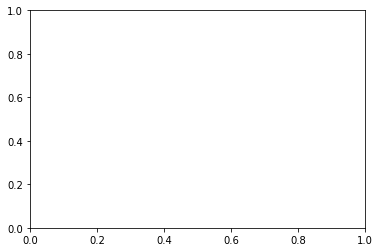

In [16]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

plt.plot(np.arange(1, len(arr)+1), arr[0])
plt.ylabel('total_average_scores')
plt.xlabel('Episode #')
plt.show()

### 6. Watch the agent running with saved weights

In [14]:
# Load the saved weights into Pytorch model
agent.g.load_state_dict(torch.load('g-pendulum.pth', map_location='cpu'))
agent.d.load_state_dict(torch.load('d-pendulum.pth', map_location='cpu'))

# env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
# S = env_info.vector_observations                  # get the current states (S) (for each agent)
s = env.reset() # s: state # get the current state (s) (for an agent)

#Rs = np.zeros(num_agents)                          # initialize the total scores (Rs) (for each agent)
R = 0 # R:total reward # initialize the total score (R) (for an agent)

while True:
    #A = agent.act(S)                        # select actions (A) from loaded model agents
    a = agent.act(np.reshape(s, [1, -1])) # a: [-1, +1]    # select action (a) from loaded model agent
    
    # env_info = env.step(A)[brain_name]           # send all actions (A) to tne environment (env)
    # S2 = env_info.vector_observations         # get next states (S2) (for each agent)
    # rewards = env_info.rewards                         # get rewards (for each agent)
    # dones = env_info.local_done                        # see if the episode is done/finished (terminal)
    s2, r, done, _ = env.step(np.reshape(a, [-1]))
    
    # Rs += env_info.rewards                         # update the total scores (Rs) (for each agent)
    # S = S2                               # roll over current states (S) to next states (S2)
    R += r # update the total score (R) (for an agent)
    s = s2 # roll over current state (s) to next state (s2)
    
    #if np.any(dones):                                  # exit loop if episode is done/finished
    if done: # exit loop if episode is done/finished (terminal)
        break
        
print('Average of total scores: {}'.format(R))

FileNotFoundError: [Errno 2] No such file or directory: 'g-pendulum.pth'

When finished, you can close the environment.

In [6]:
env.close()